In [1]:
import pandas as pd
import requests
import random
from time import sleep
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import numpy as np
import nltk
import os
from sklearn import datasets
from sklearn.metrics import mean_squared_error
import datetime
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import learning_curve
import matplotlib.style as style

%matplotlib inline
%load_ext line_profiler

In [2]:
df = pd.read_pickle("Data/Fitbit_and_MFP_Cleaned.pkl")

df.reset_index(inplace=True)

df.head(50)

Date         Steps   Distance  Calories_Burned     Floors  Elevation  \
0  2016-12-16   7949.359551   6.100120           1856.0   6.528090  19.629213   
1  2016-12-17   5514.820225   4.235007           1855.0   7.089888  21.438202   
2  2016-12-18   4782.921348   3.679812           1855.0   5.146067  15.494382   
3  2016-12-19   6743.966292   5.175902           1855.0   4.640449  13.977528   
4  2016-12-20   7318.181818   5.671428           1854.0   5.215909  15.704545   
5  2016-12-21   7112.386364   5.472372           1854.0   3.909091  11.761364   
6  2016-12-22   7365.511364   5.715491           1854.0   4.420455  13.284091   
7  2016-12-23   7949.359551   6.100120           1853.0   6.528090  19.629213   
8  2016-12-24   5514.820225   4.235007           1853.0   7.089888  21.438202   
9  2016-12-25   1178.000000   0.882320           2074.0   3.000000   9.000000   
10 2016-12-26   4058.000000   3.039440           2629.0   3.000000   9.000000   
11 2016-12-27   6378.000000   4.777120           2633.0   3.000000   9.000000   
12 2016-12-28   9507.000000   7.581090           3267.0   9.000000  27.000000   
13 2016-12-29   6472.000000   4.847520           2775.0   6.000000  18.000000   
14 2016-12-30   2989.000000   2.238760           2384.0   6.528090  19.629213   
15 2016-12-31    784.000000   0.587210           2155.0   1.000000   3.000000   
16 2017-01-01    137.000000   0.102610           1887.0   5.146067  15.494382   
17 2017-01-02   4791.000000   4.045170           2617.0   1.000000   3.000000   
18 2017-01-03   5224.000000   3.912770           2497.0   4.000000  12.000000   
19 2017-01-04   7864.000000   6.401960           2972.0   1.000000   3.000000   
20 2017-01-05   4709.000000   3.527040           2460.0   1.000000   3.000000   
21 2017-01-06  13146.000000  10.306040           3637.0   8.000000  24.000000   
22 2017-01-07   3002.000000   2.248490           2326.0   1.000000   3.000000   
23 2017-01-08   4392.000000   3.289600           2579.0   1.000000   3.000000   
24 2017-01-09   5423.000000   4.061820           2615.0   4.640449  13.977528   
25 2017-01-10  10152.000000   8.221600           2985.0   7.000000  21.000000   
26 2017-01-11   9289.000000   6.957460           3123.0   1.000000   3.000000   
27 2017-01-12   6284.000000   4.706710           2637.0   3.000000   9.000000   
28 2017-01-13  13866.000000  11.136710           4086.0  31.000000  94.000000   
29 2017-01-14   5606.000000   4.198890           3502.0   7.000000  21.000000   
30 2017-01-15   4252.000000   3.184740           2722.0   5.000000  15.000000   
31 2017-01-16   4370.000000   3.273130           2387.0   5.000000  15.000000   
32 2017-01-17   4236.000000   3.172760           2570.0   3.000000   9.000000   
33 2017-01-18   8486.000000   6.356010           2963.0   4.000000  12.000000   
34 2017-01-19   7820.000000   6.483520           2803.0   1.000000   3.000000   
35 2017-01-20   9125.000000   6.834620           3025.0  10.000000  30.000000   
36 2017-01-21   2143.000000   1.605100           2186.0   1.000000   3.000000   
37 2017-01-22   1577.000000   1.181170           2128.0   2.000000   6.000000   
38 2017-01-23   6655.000000   4.984590           2740.0   4.000000  12.000000   
39 2017-01-24   7670.000000   6.375790           2847.0   3.000000   9.000000   
40 2017-01-25   6570.000000   4.920930           2701.0   4.000000  12.000000   
41 2017-01-26   7115.000000   5.329130           2755.0   1.000000   3.000000   
42 2017-01-27   9127.000000   7.467410           3059.0   1.000000   3.000000   
43 2017-01-28  10536.000000   7.890710           3065.0   2.000000   6.000000   
44 2017-01-29   3442.000000   2.578050           2759.0   6.000000  18.000000   
45 2017-01-30  10809.000000   9.136760           3259.0   1.000000   3.000000   
46 2017-01-31   8051.000000   6.030190           2714.0   3.000000   9.000000   
47 2017-02-01   9569.000000   8.035370           2886.0   2.000000   6.000000   
48 2017-02-02   7826.000000   6.497250  

In [3]:
## INTERPOLATING WEIGHTS THAT ARE MISSING

df.Weight = df.Weight.interpolate(method='linear')
df.drop('Day_of_week', axis=1, inplace=True)

df.head(50)

Date         Steps   Distance  Calories_Burned     Floors  Elevation  \
0  2016-12-16   7949.359551   6.100120           1856.0   6.528090  19.629213   
1  2016-12-17   5514.820225   4.235007           1855.0   7.089888  21.438202   
2  2016-12-18   4782.921348   3.679812           1855.0   5.146067  15.494382   
3  2016-12-19   6743.966292   5.175902           1855.0   4.640449  13.977528   
4  2016-12-20   7318.181818   5.671428           1854.0   5.215909  15.704545   
5  2016-12-21   7112.386364   5.472372           1854.0   3.909091  11.761364   
6  2016-12-22   7365.511364   5.715491           1854.0   4.420455  13.284091   
7  2016-12-23   7949.359551   6.100120           1853.0   6.528090  19.629213   
8  2016-12-24   5514.820225   4.235007           1853.0   7.089888  21.438202   
9  2016-12-25   1178.000000   0.882320           2074.0   3.000000   9.000000   
10 2016-12-26   4058.000000   3.039440           2629.0   3.000000   9.000000   
11 2016-12-27   6378.000000   4.777120           2633.0   3.000000   9.000000   
12 2016-12-28   9507.000000   7.581090           3267.0   9.000000  27.000000   
13 2016-12-29   6472.000000   4.847520           2775.0   6.000000  18.000000   
14 2016-12-30   2989.000000   2.238760           2384.0   6.528090  19.629213   
15 2016-12-31    784.000000   0.587210           2155.0   1.000000   3.000000   
16 2017-01-01    137.000000   0.102610           1887.0   5.146067  15.494382   
17 2017-01-02   4791.000000   4.045170           2617.0   1.000000   3.000000   
18 2017-01-03   5224.000000   3.912770           2497.0   4.000000  12.000000   
19 2017-01-04   7864.000000   6.401960           2972.0   1.000000   3.000000   
20 2017-01-05   4709.000000   3.527040           2460.0   1.000000   3.000000   
21 2017-01-06  13146.000000  10.306040           3637.0   8.000000  24.000000   
22 2017-01-07   3002.000000   2.248490           2326.0   1.000000   3.000000   
23 2017-01-08   4392.000000   3.289600           2579.0   1.000000   3.000000   
24 2017-01-09   5423.000000   4.061820           2615.0   4.640449  13.977528   
25 2017-01-10  10152.000000   8.221600           2985.0   7.000000  21.000000   
26 2017-01-11   9289.000000   6.957460           3123.0   1.000000   3.000000   
27 2017-01-12   6284.000000   4.706710           2637.0   3.000000   9.000000   
28 2017-01-13  13866.000000  11.136710           4086.0  31.000000  94.000000   
29 2017-01-14   5606.000000   4.198890           3502.0   7.000000  21.000000   
30 2017-01-15   4252.000000   3.184740           2722.0   5.000000  15.000000   
31 2017-01-16   4370.000000   3.273130           2387.0   5.000000  15.000000   
32 2017-01-17   4236.000000   3.172760           2570.0   3.000000   9.000000   
33 2017-01-18   8486.000000   6.356010           2963.0   4.000000  12.000000   
34 2017-01-19   7820.000000   6.483520           2803.0   1.000000   3.000000   
35 2017-01-20   9125.000000   6.834620           3025.0  10.000000  30.000000   
36 2017-01-21   2143.000000   1.605100           2186.0   1.000000   3.000000   
37 2017-01-22   1577.000000   1.181170           2128.0   2.000000   6.000000   
38 2017-01-23   6655.000000   4.984590           2740.0   4.000000  12.000000   
39 2017-01-24   7670.000000   6.375790           2847.0   3.000000   9.000000   
40 2017-01-25   6570.000000   4.920930           2701.0   4.000000  12.000000   
41 2017-01-26   7115.000000   5.329130           2755.0   1.000000   3.000000   
42 2017-01-27   9127.000000   7.467410           3059.0   1.000000   3.000000   
43 2017-01-28  10536.000000   7.890710           3065.0   2.000000   6.000000   
44 2017-01-29   3442.000000   2.578050           2759.0   6.000000  18.000000   
45 2017-01-30  10809.000000   9.136760           3259.0   1.000000   3.000000   
46 2017-01-31   8051.000000   6.030190           2714.0   3.000000   9.000000   
47 2017-02-01   9569.000000   8.035370           2886.0   2.000000   6.000000   
48 2017-02-02   7826.000000   6.497250  

In [4]:
sns.pairplot(df)

ValueError: max must be larger than min in range parameter.

In [6]:
df.corr()

Steps  Distance  Calories_Burned    Floors  \
Steps                        1.000000  0.995766         0.819990  0.558649   
Distance                     0.995766  1.000000         0.818133  0.559068   
Calories_Burned              0.819990  0.818133         1.000000  0.420462   
Floors                       0.558649  0.559068         0.420462  1.000000   
Elevation                    0.558907  0.559315         0.420316  0.999978   
Activity_Calories            0.813502  0.812858         0.840080  0.380661   
Minutes_Sedentary           -0.289497 -0.292332        -0.446800 -0.141470   
Minutes_Lightly_Active       0.450569  0.441155         0.513868  0.023356   
Minutes_Fairly_Active        0.550001  0.537661         0.617855  0.389413   
Minutes_Very_Active          0.682267  0.684028         0.649211  0.473739   
Calories                     0.002502  0.005004        -0.009978 -0.126101   
Fat (g)                      0.000121  0.002574        -0.013506 -0.099580   
Saturated Fat                0.030337  0.031807         0.025247 -0.024224   
Polyunsaturated Fat          0.007740  0.008363         0.002067 -0.060228   
Monounsaturated Fat          0.003687  0.011594        -0.024304 -0.003679   
Trans Fat                    0.038010  0.037176         0.072371  0.074774   
Cholesterol                 -0.035989 -0.035211        -0.008914 -0.033665   
Sodium (mg)                  0.011327  0.013106        -0.003406 -0.106421   
Potassium                   -0.020058 -0.020826        -0.015521 -0.047089   
Carbohydrates (g)           -0.027296 -0.026297        -0.034685 -0.110834   
Fiber                       -0.004238 -0.001051        -0.032577 -0.091156   
Sugar                        0.021094  0.021905        -0.002059  0.018460   
Protein (g)                  0.042510  0.045945         0.029610 -0.144526   
Vitamin A                   -0.008876 -0.005863        -0.019954 -0.015806   
Vitamin C                   -0.045506 -0.041790        -0.055666 -0.024743   
Calcium                     -0.034476 -0.032675        -0.015221 -0.058207   
Iron                        -0.073018 -0.075344        -0.101445 -0.058968   
Calories_Breakfast          -0.083033 -0.082111        -0.056537  0.088938   
Fat_(g)_Breakfast           -0.074256 -0.073858        -0.050411  0.056464   
Carbohydrates_(g)_Breakfast -0.049058 -0.047625        -0.040186  0.065931   
Sugar_Breakfast             -0.029940 -0.029098        -0.020348  0.060850   
Protein_(g)_Breakfast       -0.113420 -0.110960        -0.095480  0.005388   
Calories_Lunch              -0.088277 -0.086566        -0.047062 -0.093220   
Fat_(g)_Lunch               -0.029469 -0.027191        -0.010985 -0.046454   
Carbohydrates_(g)_Lunch     -0.097073 -0.093991        -0.067412 -0.066640   
Sugar_Lunch                 -0.043346 -0.039077        -0.010296  0.033765   
Protein_(g)_Lunch           -0.002820 -0.001753         0.036241 -0.079981   
Calories_Dinner             -0.081553 -0.082513        -0.037304  0.013893   
Fat_(g)_Dinner              -0.080174 -0.079089        -0.043630  0.018063   
Carbohydrates_(g)_Dinner    -0.077543 -0.077531        -0.048653 -0.011740   
Sugar_Dinner                 0.009917  0.008104         0.015949  0.040277   
Protein_(g)_Dinner           0.021561  0.019098         0.027685  0.008717   
Weight                      -0.069500 -0.070768        -0.076714 -0.117776   
Net_Calories                -0.521386 -0.515065        -0.630445 -0.334658   

                             Elevation  Activity_Calories  Minutes_Sedentary  \
Steps                         0.558907           0.813502          -0.289497   
Distance                      0.559315           0.812858          -0.292332   
Calories_Burned               0.420316           0.840080          -0.446800   
Floors                        0.999978           0.380661          -0.141470   
Elevation                     1.000000           0.381010          -0.141999   
Activity_Calories             0.381010   

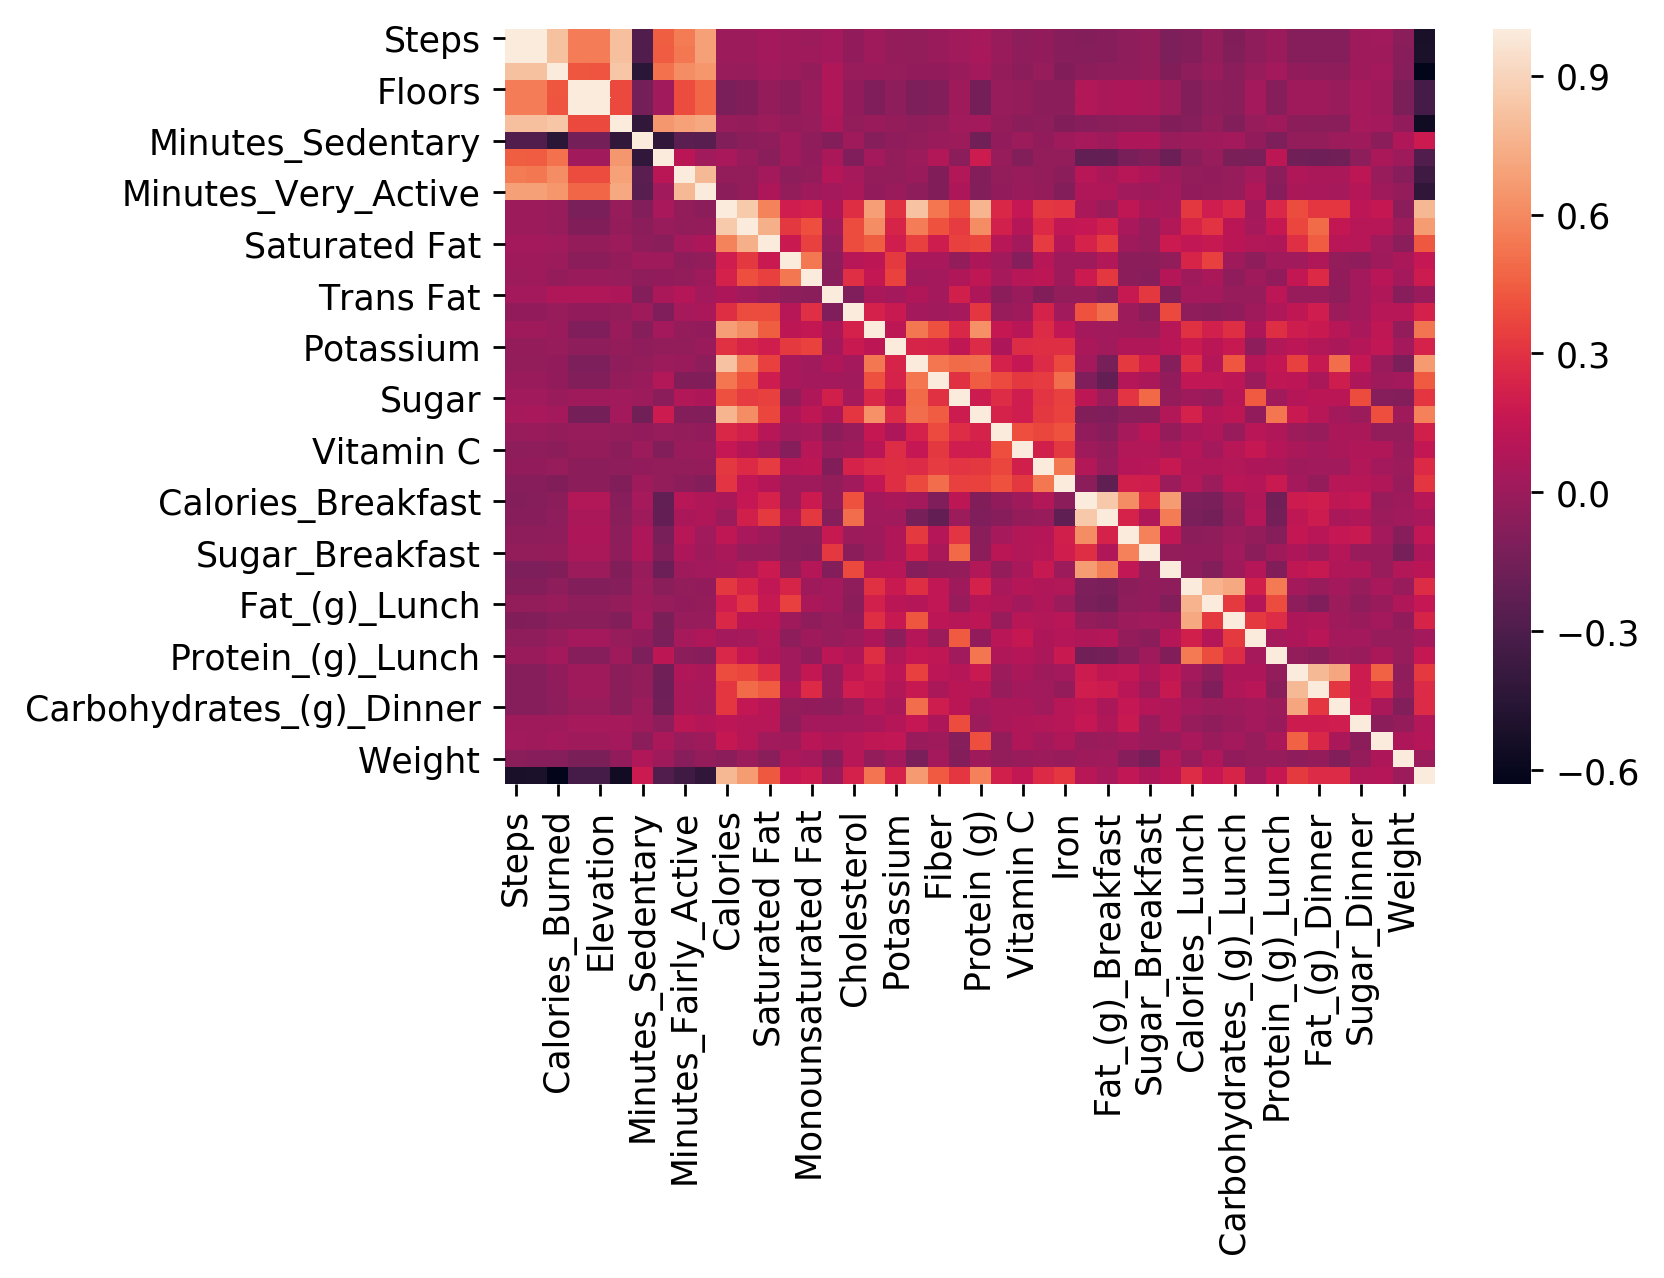

In [7]:
plt.figure(dpi=250)
sns.heatmap(df.corr())

Text(0.5,1,'Time Series of Weight')

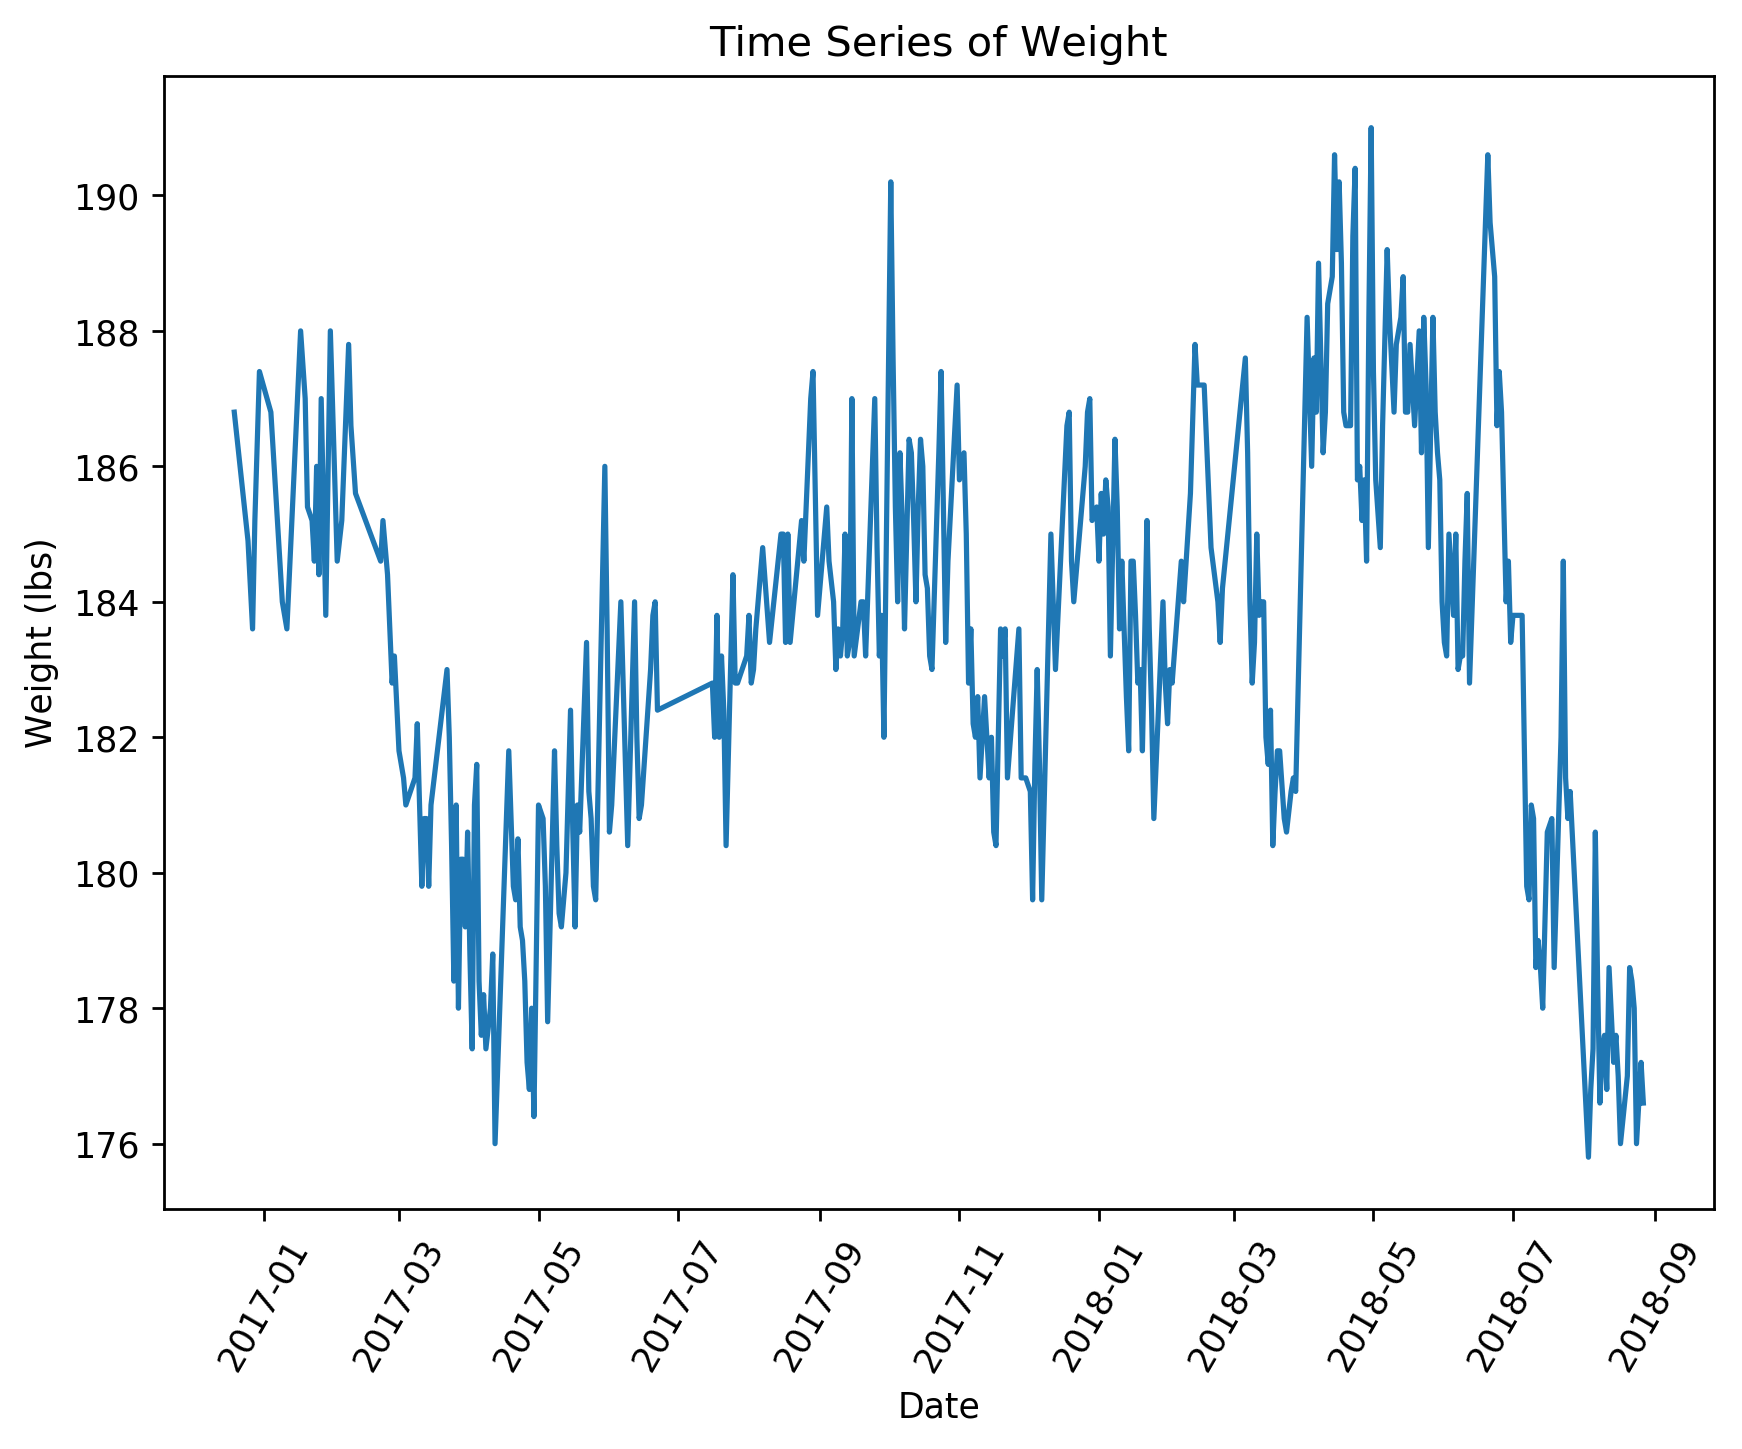

In [8]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=250, facecolor='w', edgecolor='k');

plt.plot(df.Date, df.Weight);


plt.xticks(rotation=60)
plt.xlabel('Date')
plt.ylabel('Weight (lbs)')
plt.title('Time Series of Weight')

Text(0.5,1,'Time Series of Calorie Intake')

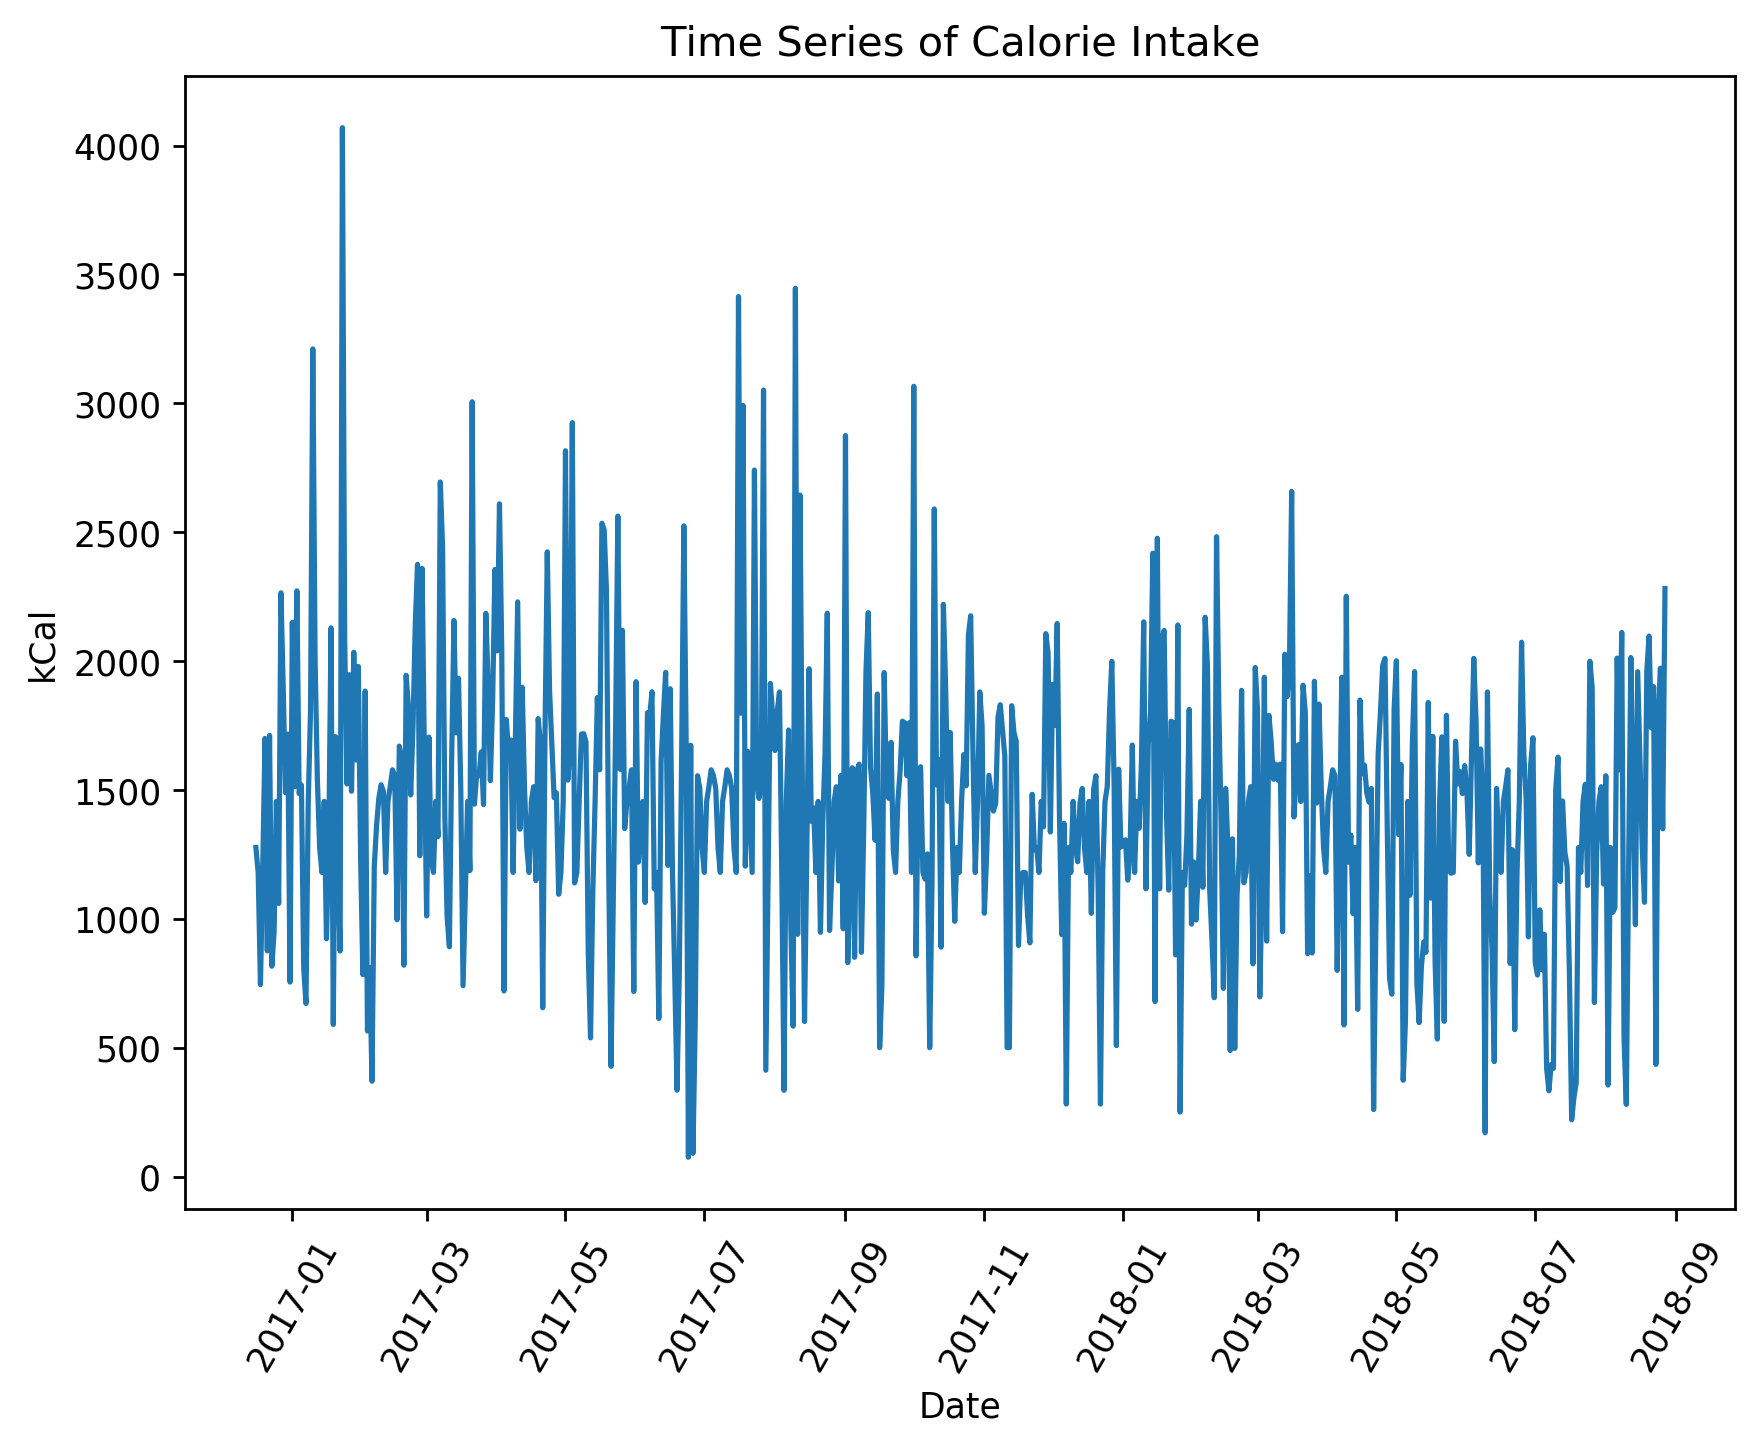

In [9]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=250, facecolor='w', edgecolor='k');

plt.plot(df.Date, df.Calories);


plt.xticks(rotation=60)
plt.xlabel('Date')
plt.ylabel('kCal')
plt.title('Time Series of Calorie Intake')

In [10]:
df["Calories_MA30"] = df.Calories.rolling(window=30, center=True).mean()
df["Weight_MA30"] = df.Weight.rolling(window=30, center=True).mean()
df["Weight_MA7"] = df.Weight.rolling(window=7, center=True).mean()

df.head(20)

Date        Steps  Distance  Calories_Burned    Floors  Elevation  \
0  2016-12-16  7949.359551  6.100120           1856.0  6.528090  19.629213   
1  2016-12-17  5514.820225  4.235007           1855.0  7.089888  21.438202   
2  2016-12-18  4782.921348  3.679812           1855.0  5.146067  15.494382   
3  2016-12-19  6743.966292  5.175902           1855.0  4.640449  13.977528   
4  2016-12-20  7318.181818  5.671428           1854.0  5.215909  15.704545   
5  2016-12-21  7112.386364  5.472372           1854.0  3.909091  11.761364   
6  2016-12-22  7365.511364  5.715491           1854.0  4.420455  13.284091   
7  2016-12-23  7949.359551  6.100120           1853.0  6.528090  19.629213   
8  2016-12-24  5514.820225  4.235007           1853.0  7.089888  21.438202   
9  2016-12-25  1178.000000  0.882320           2074.0  3.000000   9.000000   
10 2016-12-26  4058.000000  3.039440           2629.0  3.000000   9.000000   
11 2016-12-27  6378.000000  4.777120           2633.0  3.000000   9.000000   
12 2016-12-28  9507.000000  7.581090           3267.0  9.000000  27.000000   
13 2016-12-29  6472.000000  4.847520           2775.0  6.000000  18.000000   
14 2016-12-30  2989.000000  2.238760           2384.0  6.528090  19.629213   
15 2016-12-31   784.000000  0.587210           2155.0  1.000000   3.000000   
16 2017-01-01   137.000000  0.102610           1887.0  5.146067  15.494382   
17 2017-01-02  4791.000000  4.045170           2617.0  1.000000   3.000000   
18 2017-01-03  5224.000000  3.912770           2497.0  4.000000  12.000000   
19 2017-01-04  7864.000000  6.401960           2972.0  1.000000   3.000000   

    Activity_Calories  Minutes_Sedentary  Minutes_Lightly_Active  \
0         1059.067416             1440.0              180.853933   
1          781.202247             1440.0              102.426966   
2          702.179775             1440.0               85.123596   
3          869.786517             1440.0              127.393258   
4          911.261364             1440.0              148.397727   
5          899.102273             1440.0              155.465909   
6          857.477273             1440.0              145.545455   
7         1059.067416             1440.0              180.853933   
8          781.202247             1440.0              102.426966   
9          268.000000             1368.0               72.000000   
10         973.000000              750.0              210.000000   
11         923.000000              848.0              168.000000   
12        1464.000000              699.0              262.000000   
13        1054.000000              793.0              141.000000   
14         495.000000              781.0              120.000000   
15         172.000000              987.0               45.000000   
16          33.000000             1431.0                9.000000   
17         840.000000              829.0              131.000000   
18         776.000000              840.0              174.000000   
19        1319.000000              710.0              205.000000   

    Minutes_Fairly_Active     ...      Calories_Dinner  Fat_(g)_Dinner  \
0                8.977528     ...           612.128571       26.658929   
1               13.404494     ...           686.482353       28.591176   
2               12.157303     ...           864.811628       41.697674   
3                9.348315     ...           175.000000       27.105797   
4                8.636364     ...           519.700000       15.600000   
5                7.477273     ...           653.856044       26.008791   
6                6.340909     ...           629.000000       25.000000   
7                8.977528     ...           612.128571       26.658929   
8               13.404494     ...           686.482353       28.591176   
9               12.157303     ...           864.811628       41.697674   
10               8.000000     ...           739.563768       27.105797   
11               1.000000     ...           880.00000

Text(0.5,1,'Time Series of Weight (30 Day RWindow)')

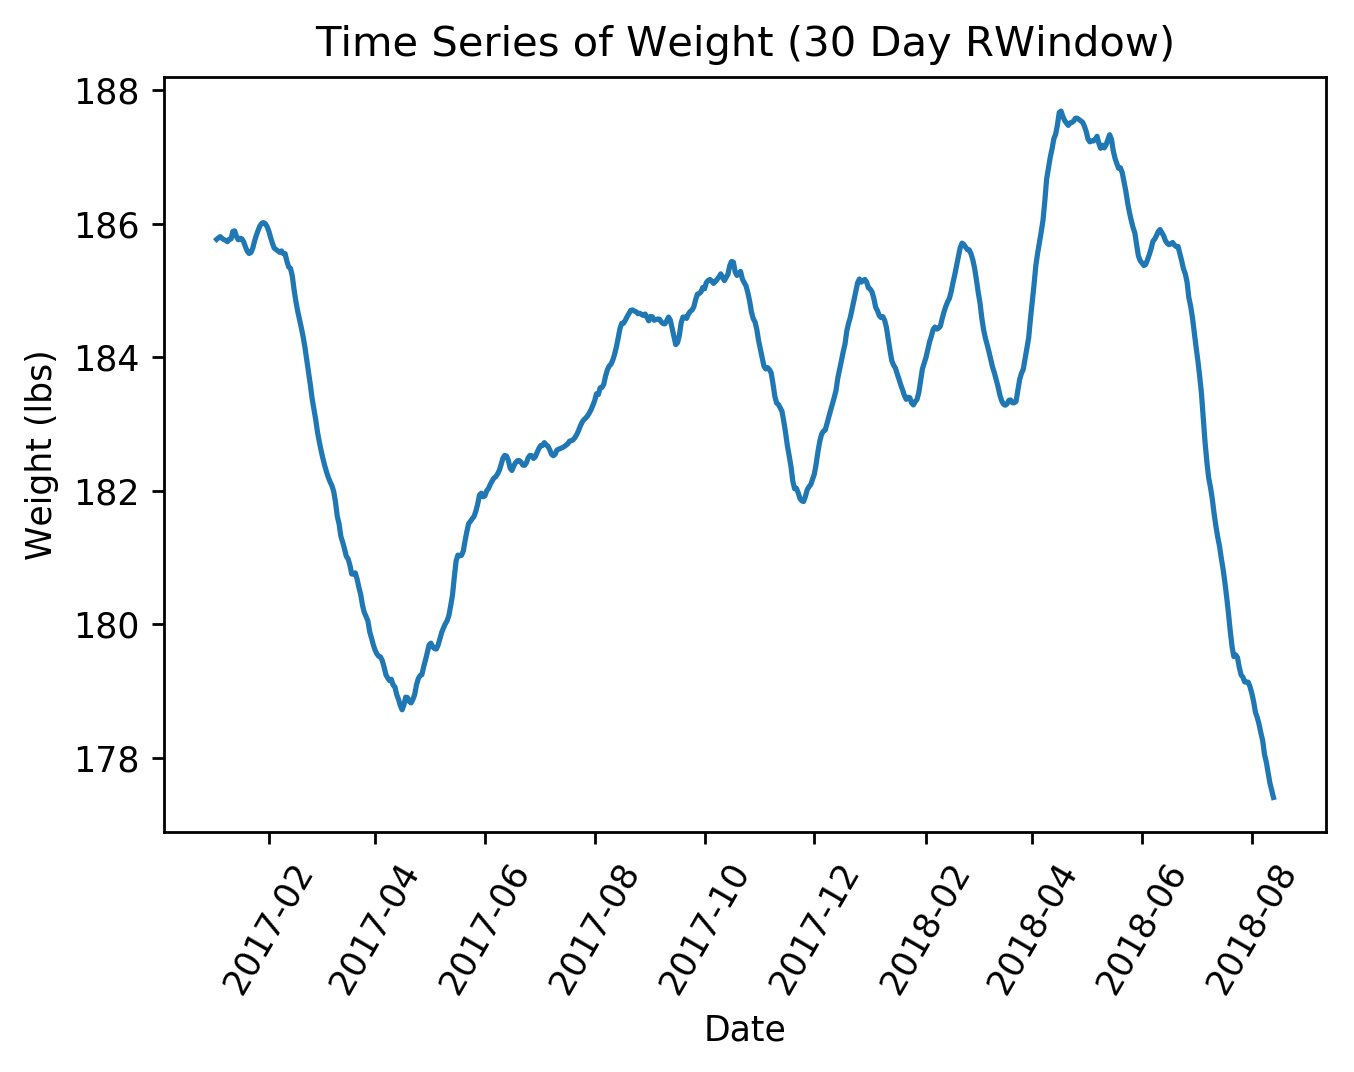

In [11]:
df.set_index('Date', inplace=True)

plt.figure(dpi=250)
plt.plot(df["Weight_MA30"])
plt.xticks(rotation=60)
plt.xlabel('Date')
plt.ylabel('Weight (lbs)')
plt.title('Time Series of Weight (30 Day RWindow)')

<Figure size 1500x1000 with 0 Axes>

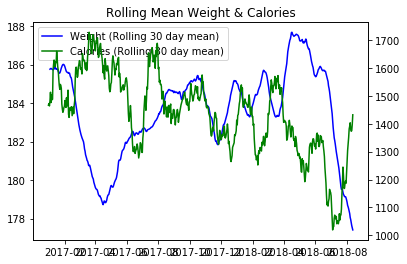

In [12]:
plt.figure(dpi=250)

fig, ax = plt.subplots(1, 1)
ax2 = ax.twinx()
orig = ax.plot(df["Weight_MA30"], color='blue',label='Weight (Rolling 30 day mean)')
std = ax2.plot(df["Calories_MA30"], color='green', label = 'Calories (Rolling 30 day mean)')


lines = ax.get_lines() + ax2.get_lines()
ax.legend(lines, [line.get_label() for line in lines], loc='upper left')

plt.draw()
plt.xticks(rotation=60)
plt.title('Rolling Mean Weight & Calories')
plt.show(block=False)

Text(0.5,1,'Time Series of Calories (30 Day RWindow)')

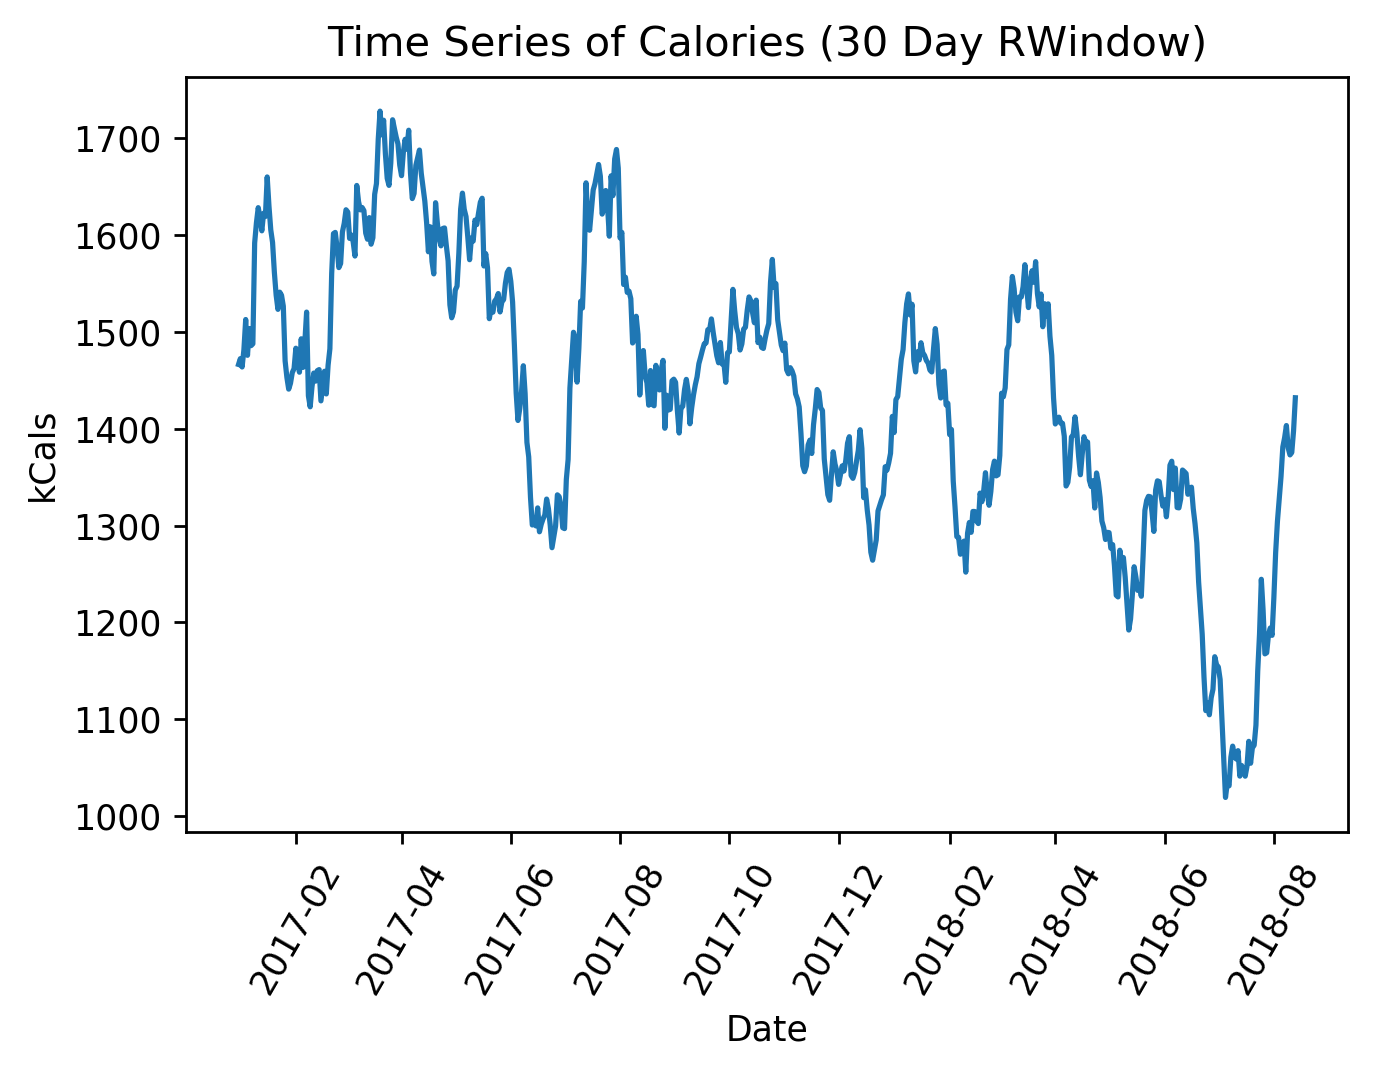

In [13]:
plt.figure(dpi=250)
plt.plot(df["Calories_MA30"])
plt.xticks(rotation=60)
plt.xlabel('Date')
plt.ylabel('kCals')
plt.title('Time Series of Calories (30 Day RWindow)')

(array([736361., 736420., 736481., 736542., 736603., 736664., 736726.,
        736785., 736846., 736907.]), <a list of 10 Text xticklabel objects>)

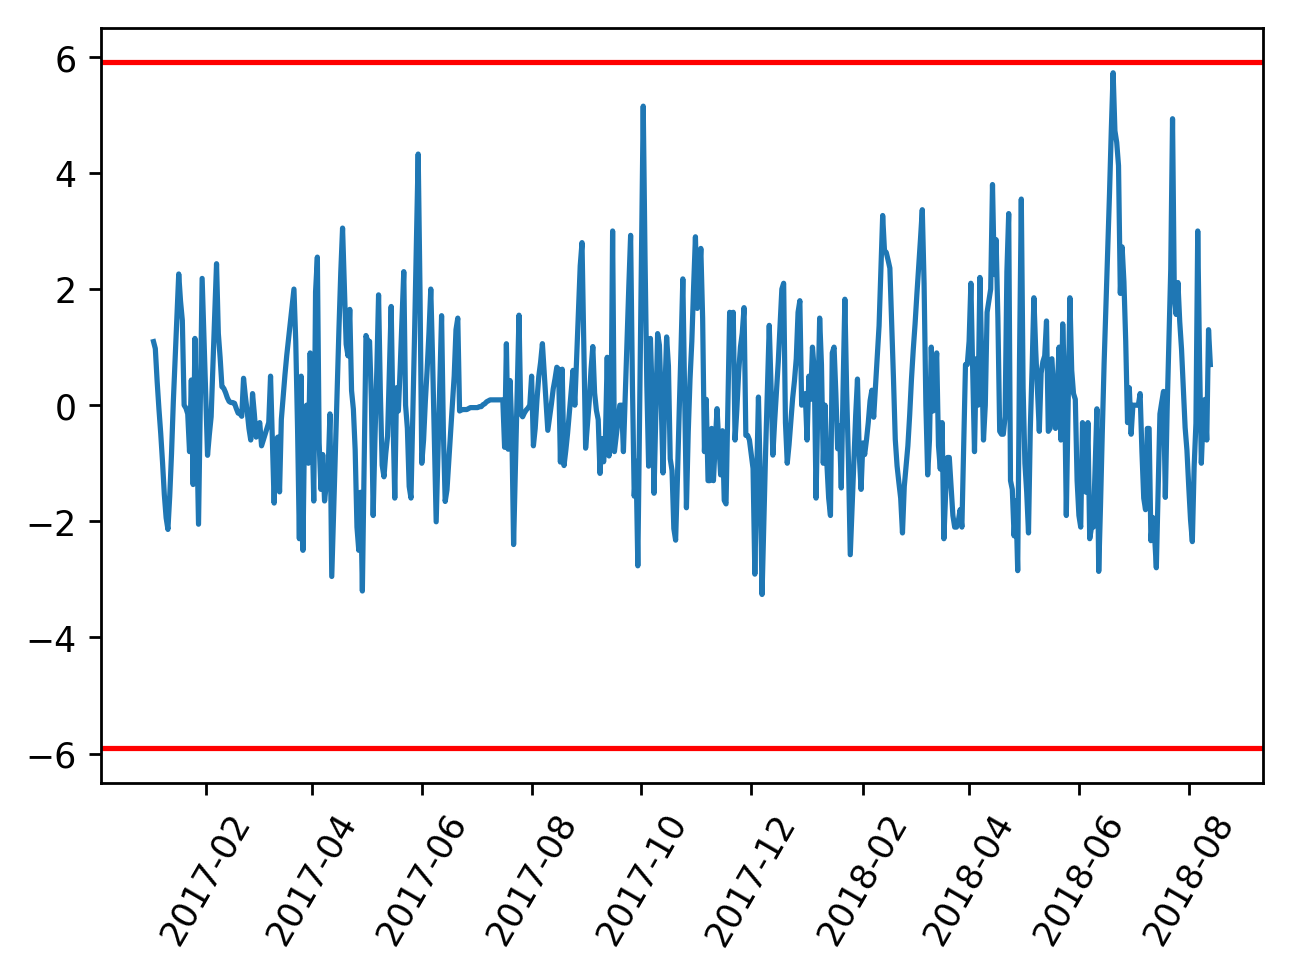

In [14]:
df['Median_Weight'] = df['Weight'].rolling(30, center=True).median()
df['Std_Weight'] = df['Weight'].rolling(30, center=True).std()
std_dev = df['Weight'].std()

df['residual'] = df['Weight'] - df['Median_Weight']

plt.figure(dpi=250)
plt.plot(df['residual'])
plt.gca().axhline(2*std_dev, c='r')
plt.gca().axhline(-2*std_dev, c='r')
plt.xticks(rotation=60)

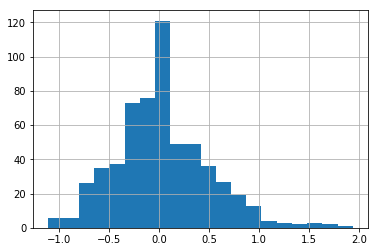

In [15]:
df['z'] = df['residual'] / std_dev
df['z'].hist(bins=20);

In [16]:
print('0 diffs:', df['Weight'].std())
print('1 diffs:', df['Weight'].diff().std())
print('2 diffs:', df['Weight'].diff().diff().std())
print('3 diffs:', df['Weight'].diff().diff().diff().std())

0 diffs: 2.95515957446908
1 diffs: 1.160816534567066
2 diffs: 1.658913357728994
3 diffs: 2.7829457480930295


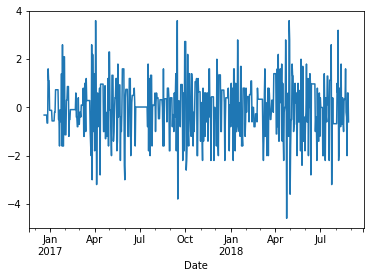

In [17]:
# Plot diff of weight over time
df.Weight.diff().plot();

In [18]:
print('0 diffs:', df['Weight_MA30'].std())
print('1 diffs:', df['Weight_MA30'].diff().std())
print('2 diffs:', df['Weight_MA30'].diff().diff().std())
print('3 diffs:', df['Weight_MA30'].diff().diff().diff().std())

0 diffs: 2.29240003580921
1 diffs: 0.10483760424082547
2 diffs: 0.05433935841441896
3 diffs: 0.07736362518599726


In [19]:
print('0 diffs:', df['Weight_MA7'].std())
print('1 diffs:', df['Weight_MA7'].diff().std())
print('2 diffs:', df['Weight_MA7'].diff().diff().std())
print('3 diffs:', df['Weight_MA7'].diff().diff().diff().std())

0 diffs: 2.712546722820142
1 diffs: 0.2961362415048554
2 diffs: 0.22011006030406025
3 diffs: 0.3296200136106706


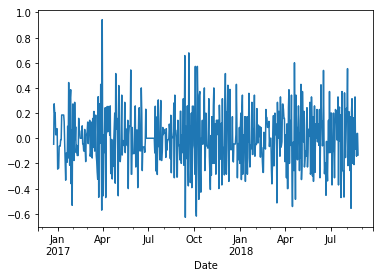

In [20]:
# Plot diff of weight over time
df.Weight_MA7.diff().diff().plot();

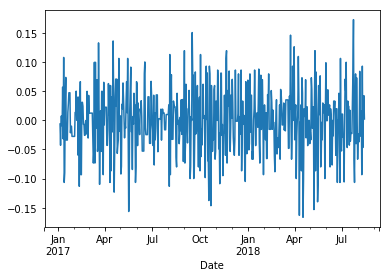

In [21]:
# Plot diff of weight over time
df.Weight_MA30.diff().diff().plot();

In [22]:
print(len(df))
print(df.Weight[:150].mean())
print(df.Weight[150:300].mean())
print(df.Weight[300:450].mean())
print(df.Weight[450:].mean())

620
182.66122448979598
183.4406666666667
184.13199999999998
183.6111764705881


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.dummy import DummyRegressor

df['diff_weight'] = df['Weight'].diff()

df['diff_weight_MA_30'] = df['diff_weight'].rolling(30, center=True).median()
df['diff_weight_MA_7'] = df['diff_weight'].rolling(7, center=True).median()

df['lag1'] = df['diff_weight_MA_7'].shift(1)
df.head(20)

Steps  Distance  Calories_Burned    Floors  Elevation  \
Date                                                                      
2016-12-16  7949.359551  6.100120           1856.0  6.528090  19.629213   
2016-12-17  5514.820225  4.235007           1855.0  7.089888  21.438202   
2016-12-18  4782.921348  3.679812           1855.0  5.146067  15.494382   
2016-12-19  6743.966292  5.175902           1855.0  4.640449  13.977528   
2016-12-20  7318.181818  5.671428           1854.0  5.215909  15.704545   
2016-12-21  7112.386364  5.472372           1854.0  3.909091  11.761364   
2016-12-22  7365.511364  5.715491           1854.0  4.420455  13.284091   
2016-12-23  7949.359551  6.100120           1853.0  6.528090  19.629213   
2016-12-24  5514.820225  4.235007           1853.0  7.089888  21.438202   
2016-12-25  1178.000000  0.882320           2074.0  3.000000   9.000000   
2016-12-26  4058.000000  3.039440           2629.0  3.000000   9.000000   
2016-12-27  6378.000000  4.777120           2633.0  3.000000   9.000000   
2016-12-28  9507.000000  7.581090           3267.0  9.000000  27.000000   
2016-12-29  6472.000000  4.847520           2775.0  6.000000  18.000000   
2016-12-30  2989.000000  2.238760           2384.0  6.528090  19.629213   
2016-12-31   784.000000  0.587210           2155.0  1.000000   3.000000   
2017-01-01   137.000000  0.102610           1887.0  5.146067  15.494382   
2017-01-02  4791.000000  4.045170           2617.0  1.000000   3.000000   
2017-01-03  5224.000000  3.912770           2497.0  4.000000  12.000000   
2017-01-04  7864.000000  6.401960           2972.0  1.000000   3.000000   

            Activity_Calories  Minutes_Sedentary  Minutes_Lightly_Active  \
Date                                                                       
2016-12-16        1059.067416             1440.0              180.853933   
2016-12-17         781.202247             1440.0              102.426966   
2016-12-18         702.179775             1440.0               85.123596   
2016-12-19         869.786517             1440.0              127.393258   
2016-12-20         911.261364             1440.0              148.397727   
2016-12-21         899.102273             1440.0              155.465909   
2016-12-22         857.477273             1440.0              145.545455   
2016-12-23        1059.067416             1440.0              180.853933   
2016-12-24         781.202247             1440.0              102.426966   
2016-12-25         268.000000             1368.0               72.000000   
2016-12-26         973.000000              750.0              210.000000   
2016-12-27         923.000000              848.0              168.000000   
2016-12-28        1464.000000              699.0              262.000000   
2016-12-29        1054.000000              793.0              141.000000   
2016-12-30         495.000000              781.0              120.000000   
2016-12-31         172.000000              987.0               45.000000   
2017-01-01          33.000000             1431.0                9.000000   
2017-01-02         840.000000              829.0              131.000000   
2017-01-03         776.000000              840.0              174.000000   
2017-01-04        1319.000000              710.0              205.000000   

            Minutes_Fairly_Active  Minutes_Very_Active    ...     Weight_MA30  \
Date                                                      ...                   
2016-12-16               8.977528            16.202247    ...             NaN   
2016-12-17              13.404494            23.292135    ...             NaN   
2016-12-18              12.157303            24.078652    ...             NaN   
2016-12-19               9.348315            23.853933    ...             NaN   
2016-12-20               8.636364            17.397727    ...             NaN   
2016-12-21               7.477273            14.261364    ...             NaN   
2016-12-22               6.340909            1

In [24]:
# print Sales autocorrelation for k=1,2
print(df.Weight.diff().autocorr(lag=1)) 
print(df.Weight.diff().autocorr(lag=2))
print(df.Weight.diff().autocorr(lag=3)) 
print(df.Weight.diff().autocorr(lag=4))
print(df.Weight.diff().autocorr(lag=5)) 
print(df.Weight.diff().autocorr(lag=6))
print(df.Weight.diff().autocorr(lag=7)) 

-0.019756521062795827
-0.2124586993633359
-0.06499251414236058
-0.14124712824669
-0.07905741470032294
0.1097682325940163
0.12450551590196424


In [25]:
# print Sales autocorrelation for k=1,2
print(df.diff_weight_MA_7.autocorr(lag=1)) 
print(df.diff_weight_MA_7.autocorr(lag=2))
print(df.diff_weight_MA_7.autocorr(lag=3)) 
print(df.diff_weight_MA_7.autocorr(lag=4))
print(df.diff_weight_MA_7.autocorr(lag=5)) 
print(df.diff_weight_MA_7.autocorr(lag=6))
print(df.diff_weight_MA_7.autocorr(lag=7)) 

0.6644079972669271
0.48978542766398425
0.39444051194285124
0.26514740976474505
0.18419333987046785
0.12257673187146763
0.00823480104722168


In [26]:
# create autocorr plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # better and more arguments

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


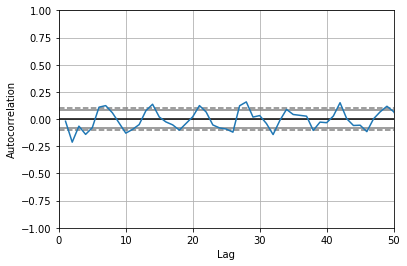

In [27]:
autocorrelation_plot(df.Weight.diff()[4:])
plt.xlim(0,50);
# we see corr at 12 and 24 because Sundays are all closed for store 1, so weeks are now six days long

Figure(432x288)
Figure(432x288)


<Figure size 900x600 with 0 Axes>

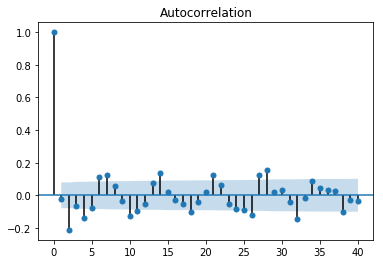

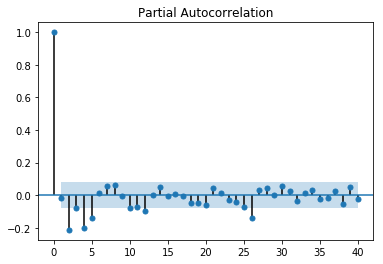

In [28]:
# create autocorr plot
# plot autocorr with statsmodel
plt.figure(dpi=150)
print(plot_acf(df.diff_weight.dropna(), lags=40)) # these are for non-stationary data, so we can see patterns, but generally ignore
print(plot_pacf(df.diff_weight.dropna(), lags=40))

Figure(432x288)
Figure(432x288)


<Figure size 900x600 with 0 Axes>

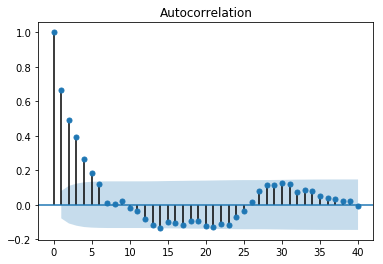

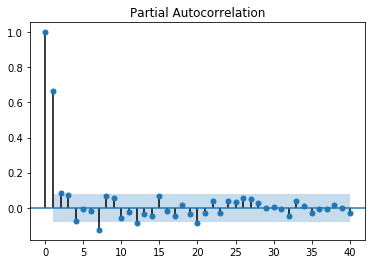

In [29]:
# create autocorr plot
# plot autocorr with statsmodel
plt.figure(dpi=150)
print(plot_acf(df.diff_weight_MA_7.dropna(), lags=40)) # these are for non-stationary data, so we can see patterns, but generally ignore
print(plot_pacf(df.diff_weight_MA_7.dropna(), lags=40))

Figure(432x288)
Figure(432x288)


<Figure size 900x600 with 0 Axes>

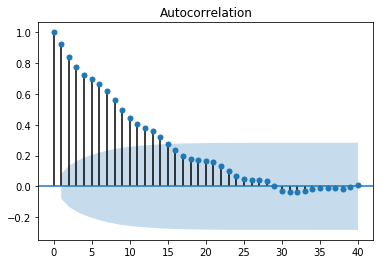

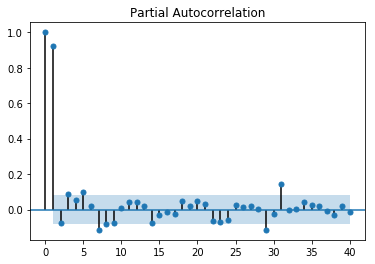

In [30]:
# create autocorr plot
# plot autocorr with statsmodel
plt.figure(dpi=150)
print(plot_acf(df.diff_weight_MA_30.dropna(), lags=40)) # these are for non-stationary data, so we can see patterns, but generally ignore
print(plot_pacf(df.diff_weight_MA_30.dropna(), lags=40))

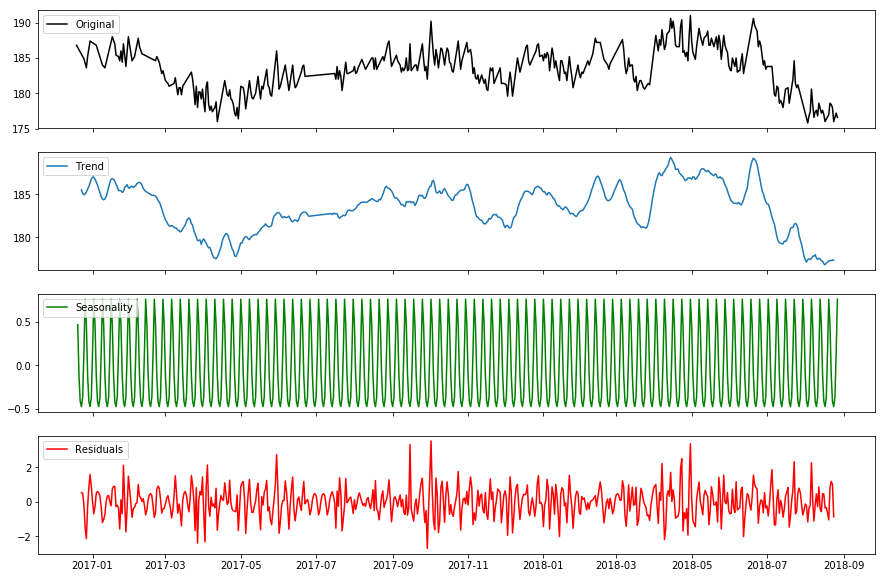

In [31]:
from  statsmodels.tsa.seasonal  import seasonal_decompose
ss_decomposition = seasonal_decompose(x=df.Weight[4:], 
                                      model='additive')
trend = ss_decomposition.trend
seasonal = ss_decomposition.seasonal
residual = ss_decomposition.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(df.Weight, 'k', label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(seasonal, 'g', label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(residual, 'r', label='Residuals')
axes[3].legend(loc='upper left')

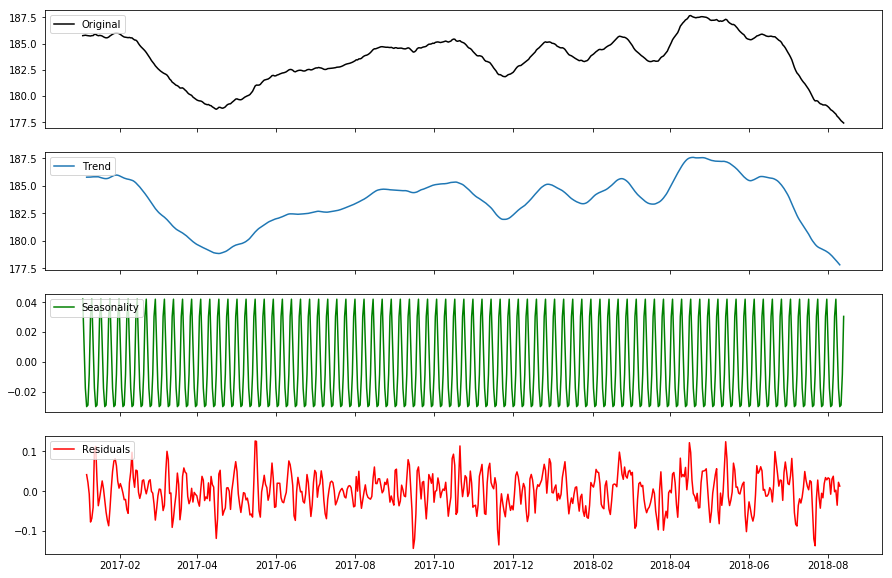

In [32]:
from  statsmodels.tsa.seasonal  import seasonal_decompose
ss_decomposition = seasonal_decompose(x=df.Weight_MA30.dropna(), 
                                      model='additive')
trend = ss_decomposition.trend
seasonal = ss_decomposition.seasonal
residual = ss_decomposition.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(df.Weight_MA30, 'k', label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(seasonal, 'g', label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(residual, 'r', label='Residuals')
axes[3].legend(loc='upper left')

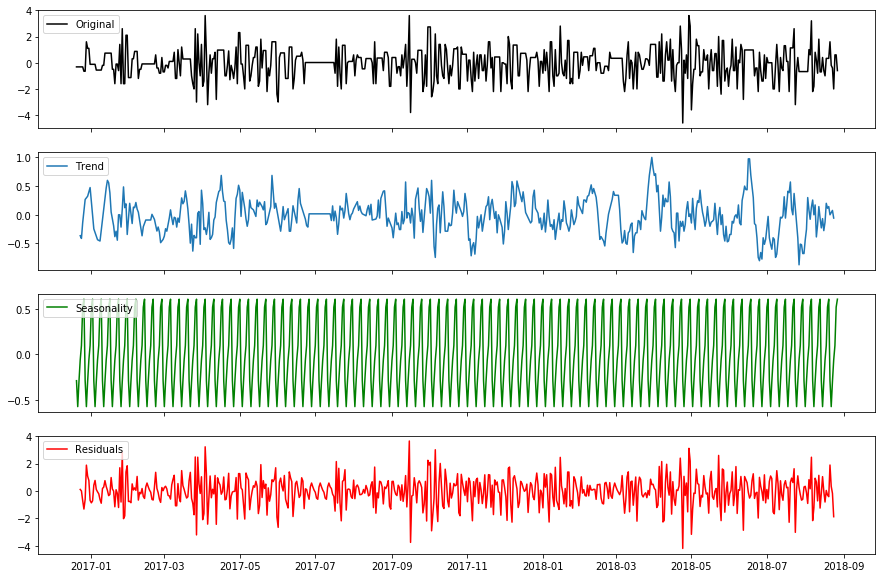

In [33]:
from  statsmodels.tsa.seasonal  import seasonal_decompose
ss_decomposition = seasonal_decompose(x=df.diff_weight.dropna(), 
                                      model='additive')
trend = ss_decomposition.trend
seasonal = ss_decomposition.seasonal
residual = ss_decomposition.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(df.diff_weight, 'k', label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(seasonal, 'g', label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(residual, 'r', label='Residuals')
axes[3].legend(loc='upper left')

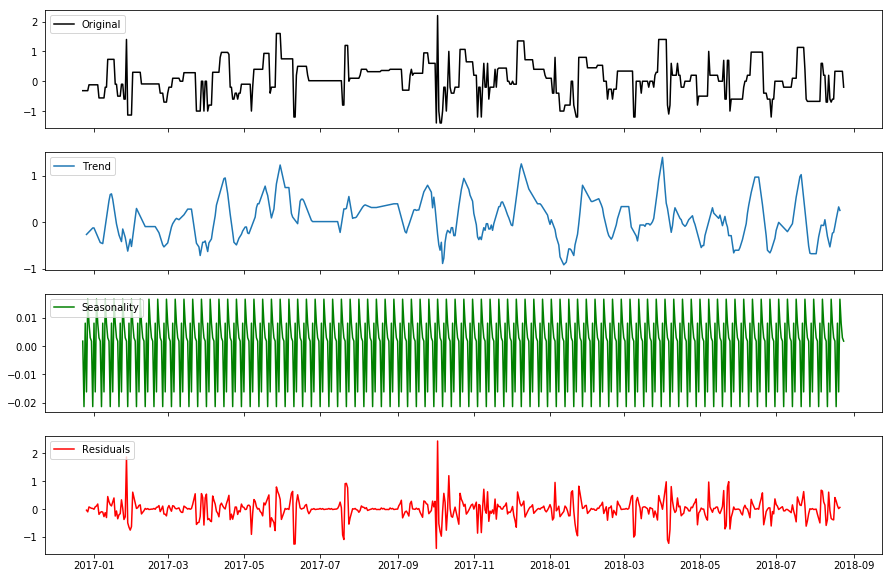

In [34]:
from  statsmodels.tsa.seasonal  import seasonal_decompose
ss_decomposition = seasonal_decompose(x=df.diff_weight_MA_7.dropna(), 
                                      model='additive')
trend = ss_decomposition.trend
seasonal = ss_decomposition.seasonal
residual = ss_decomposition.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(df.diff_weight_MA_7, 'k', label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(seasonal, 'g', label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(residual, 'r', label='Residuals')
axes[3].legend(loc='upper left')

In [35]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7, center=True).mean()
    rolstd = timeseries.rolling(window=7, center=True).std()

    #Plot rolling statistics:
    plt.figure(dpi=150)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    
    plt.draw()
    plt.legend(loc='best')
    plt.xticks(rotation=60)
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    timeseries.dropna(inplace=True)
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

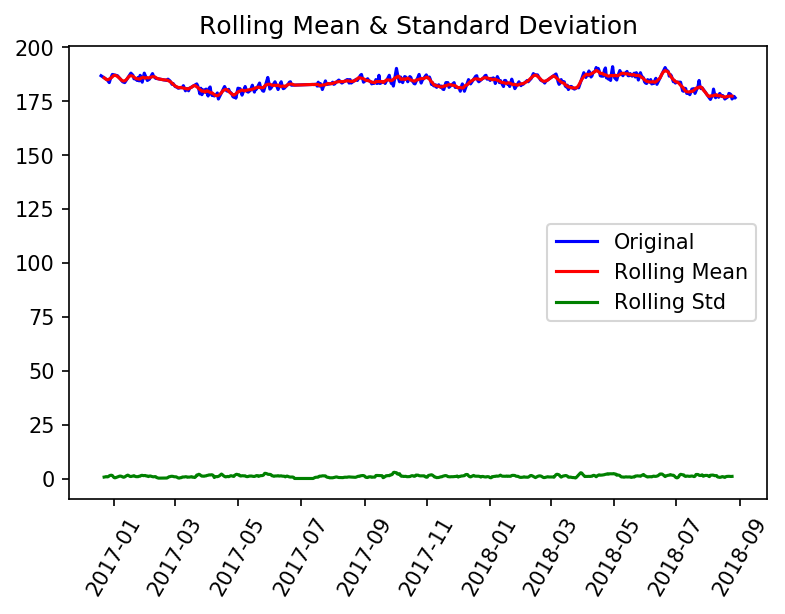

Results of Dickey-Fuller Test:
Test Statistic                  -2.057123
p-value                          0.262101
#Lags Used                      12.000000
Number of Observations Used    604.000000
Critical Value (1%)             -3.441223
Critical Value (5%)             -2.866337
Critical Value (10%)            -2.569325
dtype: float64


In [36]:
test_stationarity(df.Weight)

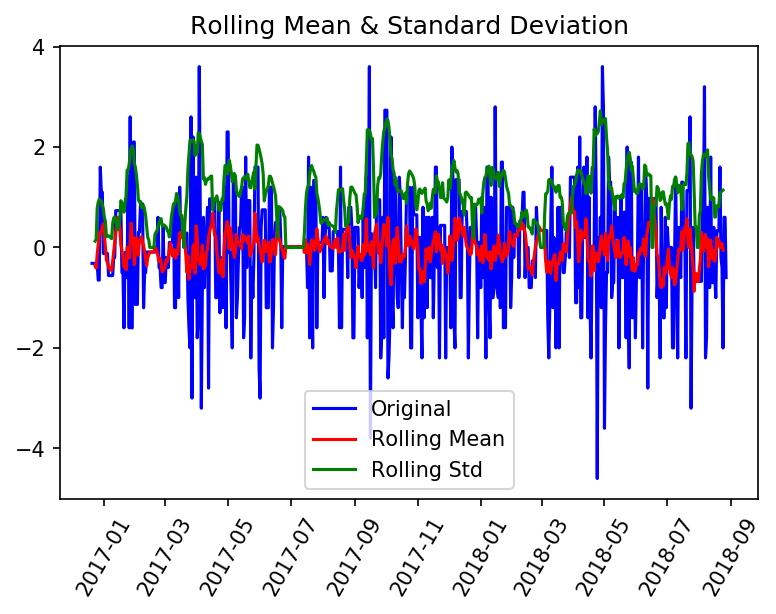

Results of Dickey-Fuller Test:
Test Statistic                -9.368115e+00
p-value                        7.503975e-16
#Lags Used                     1.100000e+01
Number of Observations Used    6.040000e+02
Critical Value (1%)           -3.441223e+00
Critical Value (5%)           -2.866337e+00
Critical Value (10%)          -2.569325e+00
dtype: float64


In [37]:
test_stationarity(df.diff_weight)

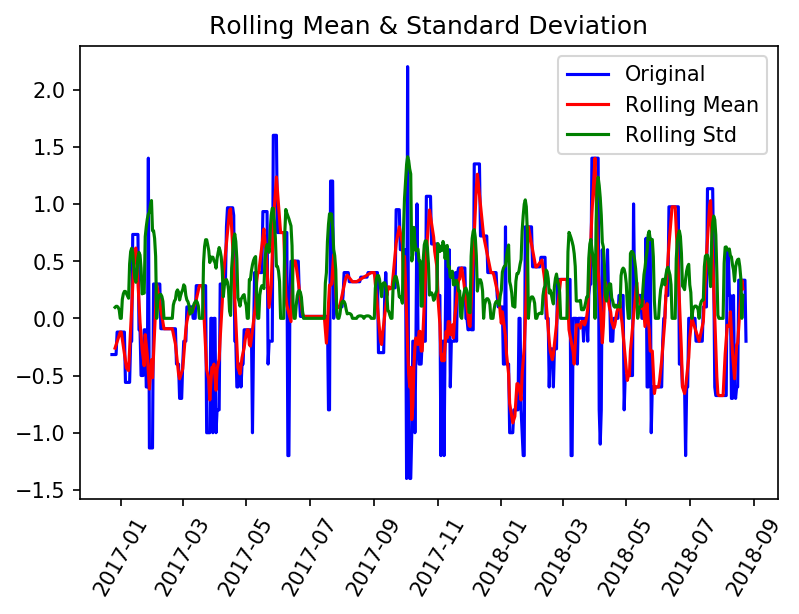

Results of Dickey-Fuller Test:
Test Statistic                -6.913742e+00
p-value                        1.194046e-09
#Lags Used                     1.100000e+01
Number of Observations Used    5.980000e+02
Critical Value (1%)           -3.441333e+00
Critical Value (5%)           -2.866385e+00
Critical Value (10%)          -2.569350e+00
dtype: float64


In [38]:
test_stationarity(df.diff_weight_MA_7)

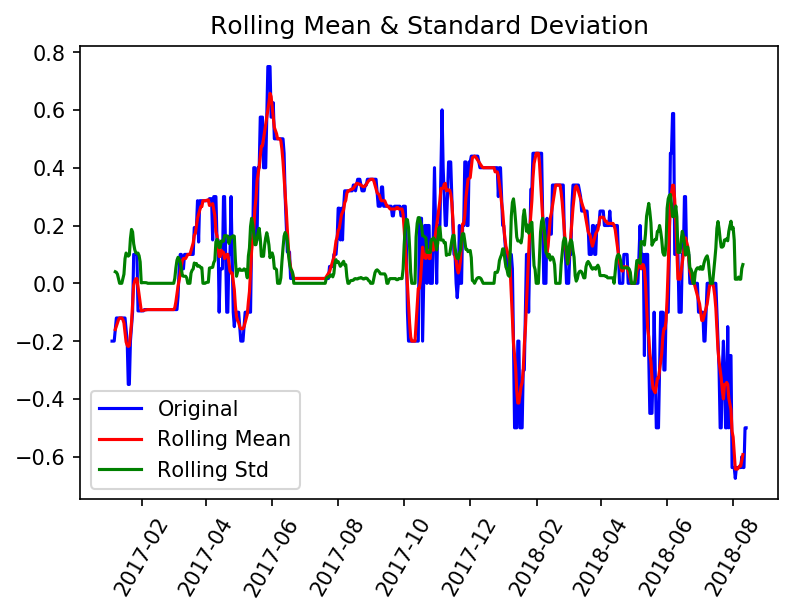

Results of Dickey-Fuller Test:
Test Statistic                  -3.981248
p-value                          0.001512
#Lags Used                       8.000000
Number of Observations Used    578.000000
Critical Value (1%)             -3.441714
Critical Value (5%)             -2.866553
Critical Value (10%)            -2.569440
dtype: float64


In [39]:
test_stationarity(df.diff_weight_MA_30)

In [40]:
df

Steps   Distance  Calories_Burned     Floors  Elevation  \
Date                                                                         
2016-12-16   7949.359551   6.100120           1856.0   6.528090  19.629213   
2016-12-17   5514.820225   4.235007           1855.0   7.089888  21.438202   
2016-12-18   4782.921348   3.679812           1855.0   5.146067  15.494382   
2016-12-19   6743.966292   5.175902           1855.0   4.640449  13.977528   
2016-12-20   7318.181818   5.671428           1854.0   5.215909  15.704545   
2016-12-21   7112.386364   5.472372           1854.0   3.909091  11.761364   
2016-12-22   7365.511364   5.715491           1854.0   4.420455  13.284091   
2016-12-23   7949.359551   6.100120           1853.0   6.528090  19.629213   
2016-12-24   5514.820225   4.235007           1853.0   7.089888  21.438202   
2016-12-25   1178.000000   0.882320           2074.0   3.000000   9.000000   
2016-12-26   4058.000000   3.039440           2629.0   3.000000   9.000000   
2016-12-27   6378.000000   4.777120           2633.0   3.000000   9.000000   
2016-12-28   9507.000000   7.581090           3267.0   9.000000  27.000000   
2016-12-29   6472.000000   4.847520           2775.0   6.000000  18.000000   
2016-12-30   2989.000000   2.238760           2384.0   6.528090  19.629213   
2016-12-31    784.000000   0.587210           2155.0   1.000000   3.000000   
2017-01-01    137.000000   0.102610           1887.0   5.146067  15.494382   
2017-01-02   4791.000000   4.045170           2617.0   1.000000   3.000000   
2017-01-03   5224.000000   3.912770           2497.0   4.000000  12.000000   
2017-01-04   7864.000000   6.401960           2972.0   1.000000   3.000000   
2017-01-05   4709.000000   3.527040           2460.0   1.000000   3.000000   
2017-01-06  13146.000000  10.306040           3637.0   8.000000  24.000000   
2017-01-07   3002.000000   2.248490           2326.0   1.000000   3.000000   
2017-01-08   4392.000000   3.289600           2579.0   1.000000   3.000000   
2017-01-09   5423.000000   4.061820           2615.0   4.640449  13.977528   
2017-01-10  10152.000000   8.221600           2985.0   7.000000  21.000000   
2017-01-11   9289.000000   6.957460           3123.0   1.000000   3.000000   
2017-01-12   6284.000000   4.706710           2637.0   3.000000   9.000000   
2017-01-13  13866.000000  11.136710           4086.0  31.000000  94.000000   
2017-01-14   5606.000000   4.198890           3502.0   7.000000  21.000000   
...                  ...        ...              ...        ...        ...   
2018-07-29   4782.921348   3.679812           1851.0   5.146067  15.494382   
2018-07-30   6743.966292   5.175902           1851.0   4.640449  13.977528   
2018-07-31   3985.000000   2.984760           2486.0   4.000000  12.000000   
2018-08-01   4173.000000   3.125570           2434.0   9.000000  27.000000   
2018-08-02   7469.000000   5.594280           3030.0  10.000000  30.000000   
2018-08-03  10066.000000   7.539430           3030.0  15.000000  45.000000   
2018-08-04   8927.000000   7.362140           2838.0  20.000000  60.000000   
2018-08-05   2260.000000   1.692740           2193.0   7.000000  21.000000   
2018-08-06   7036.000000   5.269960           2723.0   7.000000  21.000000   
2018-08-07  10049.000000   7.526700           2958.0  16.000000  48.000000   
2018-08-08   9404.000000   7.043590           3055.0  10.000000  30.000000   
2018-08-09   3897.000000   2.918850           2397.0   6.000000  18.000000   
2018-08-10   7947.000000   5.952300           2871.0  10.000000  30.000000   
2018-08-11   3713.000000   2.781030           2236.0   4.000000  12.000000   
2018-08-12   9530.000000   8.297070           2849.0  19.000000  57.000000   
2018-08-13   9455.000000   7.554350           3218.0  11.000000  33.000000   
2018-08-14   5213.000000   3.904530           2644.0   7.000000  21.000000   
2018-08-15    284.000000   0.212710           1895.0   2.000000   6.000000   
2018-08-16   7299.000000   5.466950      

In [41]:
df.iloc[9:-2, -1]

Date
2016-12-25   -0.316667
2016-12-26   -0.316667
2016-12-27   -0.316667
2016-12-28   -0.316667
2016-12-29   -0.120000
2016-12-30   -0.120000
2016-12-31   -0.120000
2017-01-01   -0.120000
2017-01-02   -0.120000
2017-01-03   -0.120000
2017-01-04   -0.120000
2017-01-05   -0.120000
2017-01-06   -0.560000
2017-01-07   -0.560000
2017-01-08   -0.560000
2017-01-09   -0.560000
2017-01-10   -0.560000
2017-01-11   -0.200000
2017-01-12   -0.200000
2017-01-13    0.733333
2017-01-14    0.733333
2017-01-15    0.733333
2017-01-16    0.733333
2017-01-17    0.733333
2017-01-18    0.733333
2017-01-19   -0.100000
2017-01-20   -0.100000
2017-01-21   -0.500000
2017-01-22   -0.500000
2017-01-23   -0.500000
                ...   
2018-07-27   -0.675000
2018-07-28   -0.675000
2018-07-29   -0.675000
2018-07-30   -0.675000
2018-07-31   -0.675000
2018-08-01   -0.675000
2018-08-02   -0.675000
2018-08-03   -0.675000
2018-08-04   -0.675000
2018-08-05   -0.675000
2018-08-06   -0.675000
2018-08-07    0.600000
2018-0

In [44]:
df.head()

Steps  Distance  Calories_Burned    Floors  Elevation  \
Date                                                                      
2016-12-16  7949.359551  6.100120           1856.0  6.528090  19.629213   
2016-12-17  5514.820225  4.235007           1855.0  7.089888  21.438202   
2016-12-18  4782.921348  3.679812           1855.0  5.146067  15.494382   
2016-12-19  6743.966292  5.175902           1855.0  4.640449  13.977528   
2016-12-20  7318.181818  5.671428           1854.0  5.215909  15.704545   

            Activity_Calories  Minutes_Sedentary  Minutes_Lightly_Active  \
Date                                                                       
2016-12-16        1059.067416             1440.0              180.853933   
2016-12-17         781.202247             1440.0              102.426966   
2016-12-18         702.179775             1440.0               85.123596   
2016-12-19         869.786517             1440.0              127.393258   
2016-12-20         911.261364             1440.0              148.397727   

            Minutes_Fairly_Active  Minutes_Very_Active  ...   Weight_MA30  \
Date                                                    ...                 
2016-12-16               8.977528            16.202247  ...           NaN   
2016-12-17              13.404494            23.292135  ...           NaN   
2016-12-18              12.157303            24.078652  ...           NaN   
2016-12-19               9.348315            23.853933  ...           NaN   
2016-12-20               8.636364            17.397727  ...           NaN   

            Weight_MA7  Median_Weight  Std_Weight  residual   z  diff_weight  \
Date                                                                           
2016-12-16         NaN            NaN         NaN       NaN NaN          NaN   
2016-12-17         NaN            NaN         NaN       NaN NaN          NaN   
2016-12-18         NaN            NaN         NaN       NaN NaN          NaN   
2016-12-19         NaN            NaN         NaN       NaN NaN          NaN   
2016-12-20         NaN            NaN         NaN       NaN NaN    -0.316667   

            diff_weight_MA_30  diff_weight_MA_7  lag1  
Date                                                   
2016-12-16                NaN               NaN   NaN  
2016-12-17                NaN               NaN   NaN  
2016-12-18                NaN               NaN   NaN  
2016-12-19                NaN               NaN   NaN  
2016-12-20                NaN               NaN   NaN  

[5 rows x 55 columns]

In [45]:
# df2 = df[np.isfinite(df['diff_weight'])]

In [46]:
# df2

In [47]:
# ar1 = LinearRegression()

# X = df2.iloc[1:, -1].values.reshape(-1,1)
# target= df2['diff_weight'].values[1:]
# ar1.fit(X[:], target[:])

# plt.figure(dpi=250)
# plt.plot(df2.index[1:], target, label='actual')
# plt.plot(df2.index[1:], ar1.predict(X[:]), label='predicted')
# plt.xticks(rotation=60)
# plt.xlabel('Date')
# plt.ylabel('diff_weight')
# plt.title('Time Series of Weight (1 Day RWindow)')

In [48]:
# ar1.score(X[1:], target[1:])

In [49]:
for i in range(1,6):
    df[f'lag{i}'] = df['diff_weight'].shift(i)

X = df.iloc[:,-7:]
X.head(20)

diff_weight_MA_30  diff_weight_MA_7      lag1      lag2      lag3  \
Date                                                                            
2016-12-16                NaN               NaN       NaN       NaN       NaN   
2016-12-17                NaN               NaN       NaN       NaN       NaN   
2016-12-18                NaN               NaN       NaN       NaN       NaN   
2016-12-19                NaN               NaN       NaN       NaN       NaN   
2016-12-20                NaN               NaN       NaN       NaN       NaN   
2016-12-21                NaN               NaN -0.316667       NaN       NaN   
2016-12-22                NaN               NaN -0.316667 -0.316667       NaN   
2016-12-23                NaN         -0.316667 -0.316667 -0.316667 -0.316667   
2016-12-24                NaN         -0.316667 -0.316667 -0.316667 -0.316667   
2016-12-25                NaN         -0.316667 -0.316667 -0.316667 -0.316667   
2016-12-26                NaN         -0.316667 -0.316667 -0.316667 -0.316667   
2016-12-27                NaN         -0.316667 -0.650000 -0.316667 -0.316667   
2016-12-28                NaN         -0.120000 -0.650000 -0.650000 -0.316667   
2016-12-29                NaN         -0.120000  1.600000 -0.650000 -0.650000   
2016-12-30                NaN         -0.120000  1.100000  1.600000 -0.650000   
2016-12-31                NaN         -0.120000  1.100000  1.100000  1.600000   
2017-01-01                NaN         -0.120000 -0.120000  1.100000  1.100000   
2017-01-02                NaN         -0.120000 -0.120000 -0.120000  1.100000   
2017-01-03                NaN         -0.120000 -0.120000 -0.120000 -0.120000   
2017-01-04               -0.2         -0.120000 -0.120000 -0.120000 -0.120000   

                lag4      lag5  
Date                            
2016-12-16       NaN       NaN  
2016-12-17       NaN       NaN  
2016-12-18       NaN       NaN  
2016-12-19       NaN       NaN  
2016-12-20       NaN       NaN  
2016-12-21       NaN       NaN  
2016-12-22       NaN       NaN  
2016-12-23       NaN       NaN  
2016-12-24 -0.316667       NaN  
2016-12-25 -0.316667 -0.316667  
2016-12-26 -0.316667 -0.316667  
2016-12-27 -0.316667 -0.316667  
2016-12-28 -0.316667 -0.316667  
2016-12-29 -0.316667 -0.316667  
2016-12-30 -0.650000 -0.316667  
2016-12-31 -0.650000 -0.650000  
2017-01-01  1.600000 -0.650000  
2017-01-02  1.100000  1.600000  
2017-01-03  1.100000  1.100000  
2017-01-04 -0.120000  1.100000

In [50]:
X = X.dropna()
y = df.loc[X.index[:-1], 'diff_weight']
X = X[:-1]

ar7 = LinearRegression()
ar7.fit(X, y)
ar7.score(X,y)

0.1600671531990261

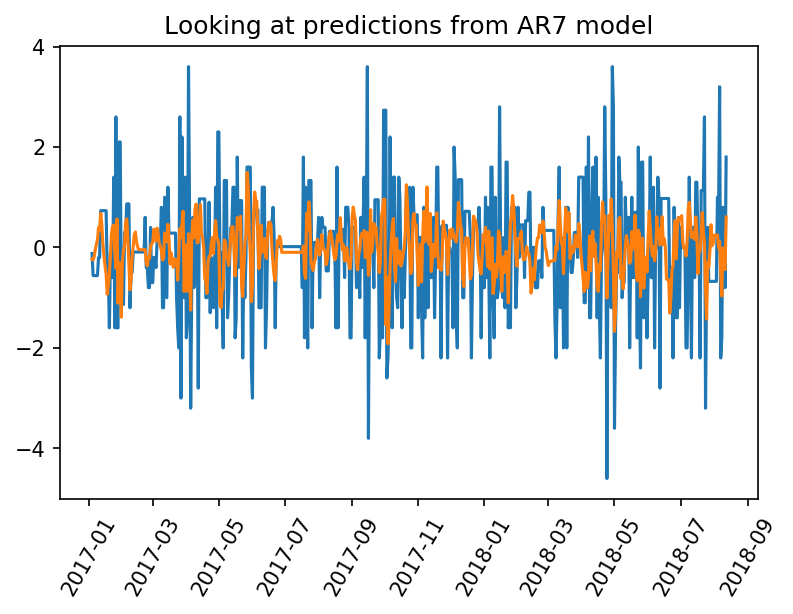

In [51]:
plt.figure(dpi=150)
plt.plot(X.index, y)
plt.plot(X.index, ar7.predict(X))
plt.title("Looking at predictions from AR7 model")
plt.xticks(rotation=60);

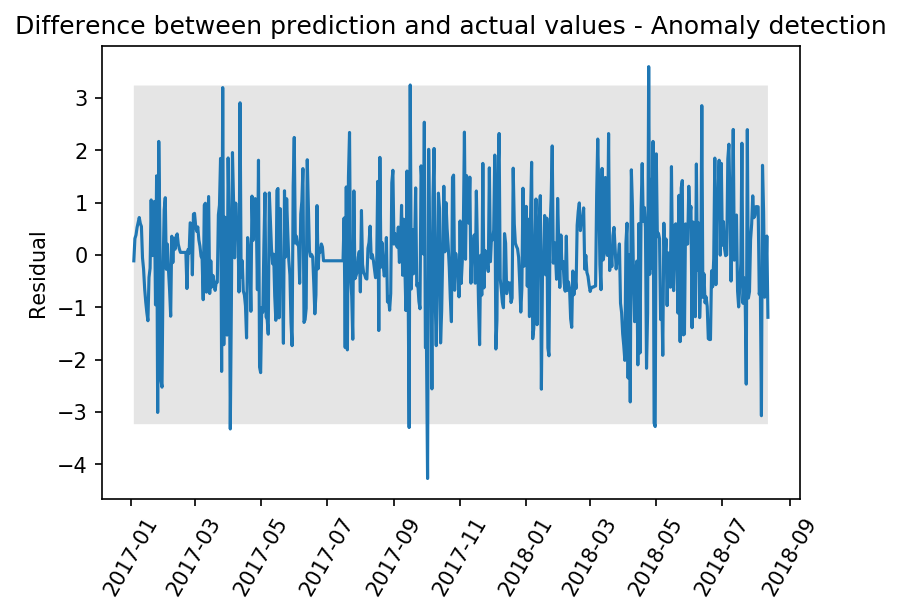

In [52]:
# Let's look at differences from the prediction:
residual = ar7.predict(X) - y
std_residual = np.std(residual)

plt.figure(dpi=150)
plt.plot(X.index, ar7.predict(X) - y)
plt.gca().fill_between(X.index, 3*std_residual, -3*std_residual, facecolor='gray', alpha=0.2)
plt.title("Difference between prediction and actual values - Anomaly detection")
plt.ylabel("Residual")
plt.xticks(rotation=60);

## POTENTIAL TO PRUNE ANOMALIES FOUND ABOVE

##### 2017-04 AND 2017-10

In [53]:
df['diff_weight'].values

array([        nan,         nan,         nan,         nan, -0.31666667,
       -0.31666667, -0.31666667, -0.31666667, -0.31666667, -0.31666667,
       -0.65      , -0.65      ,  1.6       ,  1.1       ,  1.1       ,
       -0.12      , -0.12      , -0.12      , -0.12      , -0.12      ,
       -0.56      , -0.56      , -0.56      , -0.56      , -0.56      ,
       -0.2       , -0.2       ,  0.73333333,  0.73333333,  0.73333333,
        0.73333333,  0.73333333,  0.73333333, -0.5       , -0.5       ,
       -1.6       , -0.1       , -0.1       , -0.6       ,  1.4       ,
       -1.6       ,  2.6       , -1.6       , -1.6       ,  2.1       ,
        2.1       , -1.13333333, -1.13333333, -1.13333333,  0.3       ,
        0.3       ,  0.86666667,  0.86666667,  0.86666667, -1.2       ,
       -0.5       , -0.5       , -0.09090909, -0.09090909, -0.09090909,
       -0.09090909, -0.09090909, -0.09090909, -0.09090909, -0.09090909,
       -0.09090909, -0.09090909, -0.09090909,  0.6       , -0.4 

In [54]:
from statsmodels.tsa.arima_model import ARMA, ARIMA

diff_weight = df['diff_weight'].values[8:-3]
ar7_no_ma = ARMA(diff_weight, (7,0)).fit()
ar7_no_ma.summary()

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  609
Model:                     ARMA(7, 0)   Log Likelihood                -921.397
Method:                       css-mle   S.D. of innovations              1.098
Date:                Thu, 06 Sep 2018   AIC                           1860.793
Time:                        19:35:42   BIC                           1900.500
Sample:                             0   HQIC                          1876.240
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0135      0.026     -0.516      0.606      -0.065       0.038
ar.L1.y       -0.0833      0.041     -2.057      0.040      -0.163      -0.004
ar.L2.y       -0.2585      0.041     -6.363      0.000      -0.338      -0.179
ar.L3.y       -0.1100      0.042     -2.644      0.008      -0.192      -0.028
ar.L4.y       -0.2009      0.041     -4.891      0.000      -0.281      -0.120
ar.L5.y       -0.1228      0.042     -2.944      0.003      -0.205      -0.041
ar.L6.y        0.0172      0.041      0.422      0.673      -0.063       0.097
ar.L7.y        0.0605      0.041      1.492      0.136      -0.019       0.140
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4999           -0.7448j            1.6747           -0.4266
AR.2           -1.4999           +0.7448j            1.6747            0.4266
AR.3           -0.4482           -1.2820j            1.3581           -0.3035
AR.4           -0.4482           +1.2820j            1.3581            0.3035
AR.5            0.7591           -0.9747j            1.2354           -0.1447
AR.6            0.7591           +0.9747j            1.2354            0.1447
AR.7            2.0941           -0.0000j            2.0941           -0.0000
-----------------------------------------------------------------------------
"""

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


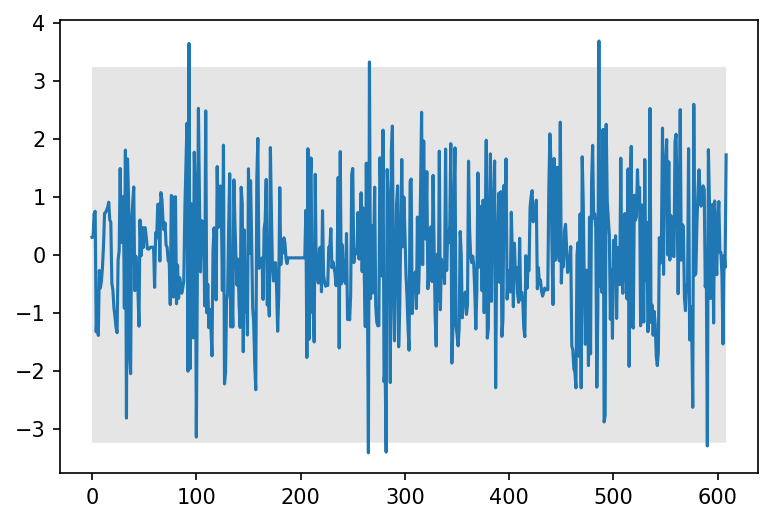

In [55]:
# plot residuals
# Same as before!
plt.figure(dpi=150)
plt.plot(-ar7_no_ma.resid)
plt.gca().fill_between(range(len(ar7_no_ma.resid)), 3*std_residual, -3*std_residual, facecolor='gray', alpha=0.2);

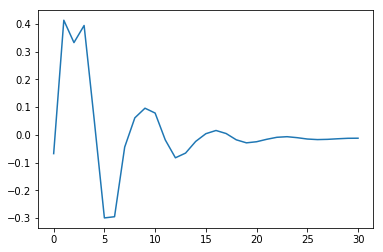

In [56]:
# forecast and plot for the next 25 periods
plt.plot(ar7_no_ma.forecast(steps=31)[0]);

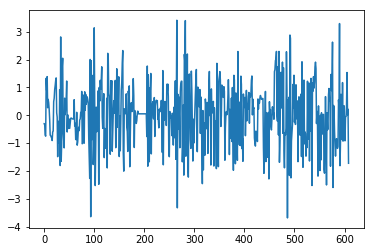

In [57]:
plt.plot(ar7_no_ma.resid);

Figure(432x288)
Figure(432x288)


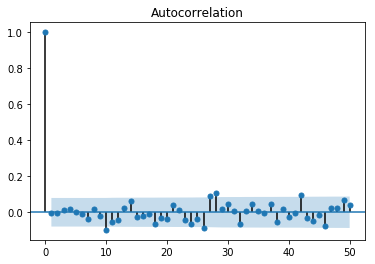

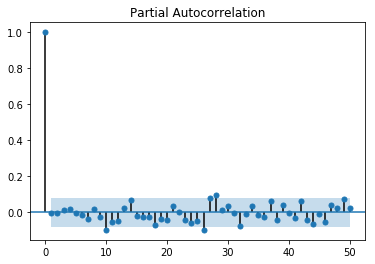

In [58]:
# plot acf and pacf
print(plot_acf(ar7_no_ma.resid, lags=50)) # small spikes and patterns show model has captured variance?
print(plot_pacf(ar7_no_ma.resid, lags=50))

In [59]:
dfw = df.diff_weight.astype('float')

dfWeight = df.Weight.astype('float')

In [60]:
type(ar7_no_ma.predict())

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


numpy.ndarray

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


AttributeError: 'numpy.ndarray' object has no attribute 'plot'

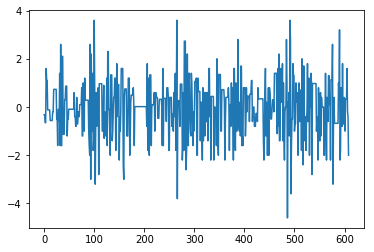

In [61]:
#diff_weight

# plot actual vs. predicted
plt.plot(diff_weight,label='actual')
ar7_no_ma.predict(start=len(diff_weight)//2,end=len(diff_weight)-5).plot(label='reconstruction') # this can't forecast future!!!
plt.legend()
plt.title("AR7 (no MA): Comparing actual to reconstruction");

In [62]:
df.columns

Index(['Steps', 'Distance', 'Calories_Burned', 'Floors', 'Elevation',
       'Activity_Calories', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories', 'Fat (g)',
       'Saturated Fat', 'Polyunsaturated Fat', 'Monounsaturated Fat',
       'Trans Fat', 'Cholesterol', 'Sodium (mg)', 'Potassium',
       'Carbohydrates (g)', 'Fiber', 'Sugar', 'Protein (g)', 'Vitamin A',
       'Vitamin C', 'Calcium', 'Iron', 'Calories_Breakfast',
       'Fat_(g)_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Fat_(g)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Fat_(g)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner', 'Weight', 'Net_Calories',
       'Calories_MA30', 'Weight_MA30', 'Weight_MA7', 'Median_Weight',
       'Std_Weight', 'residual', 'z', 'diff_weight', 'diff_weight_MA_30',
       

In [63]:
## RUNNING 7 DAY ROLLING AVERAGE WEIGHT ON MEAL SPECIFIC MACROS

X = df.loc[:, ['Steps', 'Distance', 'Calories_Burned', 'Floors', 'Elevation',
       'Activity_Calories', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Cholesterol',
       'Sodium (mg)', 'Potassium', 'Fiber','Vitamin A',
       'Vitamin C', 'Calcium', 'Iron', 'Calories_Breakfast',
       'Fat_(g)_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Fat_(g)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Fat_(g)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner','lag1', 'lag2', 'lag3', 'lag4', 'lag5']]


X = X.dropna()
y = df.loc[X.index[:-1], 'diff_weight']
X = X[:-1]

In [64]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
tscv = TimeSeriesSplit(n_splits=10)
print(tscv)  

models = [('Linear Regresion', LinearRegression),
          ('SVR', SVR),
          ('Decision Tree', DecisionTreeRegressor),
          ('Random Forest', RandomForestRegressor),
          ('Gradient Boosted Trees', GradientBoostingRegressor)
         ]

param_choices = [
    {},
    {
        'C': np.linspace(0.1,100,101)
    },
    {
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    }
]

grids = {}

for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params, scoring = 'neg_mean_squared_error')
    rmse_scores = []
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index].values.reshape(-1,), y.iloc[test_index].values.reshape(-1,)
        grid.fit(X_train, y_train)
        y_pred = grid.predict(X_test)
        mse_score = -1.0*grid.score(X_test,y_test)
        rmse_score = np.sqrt(mse_score)
        rmse_scores.append(np.round(rmse_score,4))
        avg_mse_score = np.mean(rmse_scores)
        
        s = f"{name}: best score: {grid.best_score_}, best estimator: {grid.best_estimator_}"
        
        grids[name] = grid
        
    print(f'Model name: {name}')
    print(f'RMSE scores: {rmse_scores}')
    print(f'Model RMSE performance: {avg_mse_score}')
    print('\n')

TimeSeriesSplit(max_train_size=None, n_splits=10)
Model name: Linear Regresion
RMSE scores: [2.3863, 1.2797, 1.4857, 1.1384, 1.2223, 1.0272, 0.9826, 1.4411, 1.3295, 1.2163]
Model RMSE performance: 1.35091


Model name: SVR
RMSE scores: [1.2548, 1.2871, 0.774, 1.1855, 1.2989, 1.1165, 0.8529, 1.5189, 1.174, 1.237]
Model RMSE performance: 1.16996


Model name: Decision Tree
RMSE scores: [1.3675, 1.308, 0.8368, 1.1959, 1.4534, 1.0914, 0.8663, 1.4445, 1.1369, 1.2008]
Model RMSE performance: 1.1901500000000003


Model name: Random Forest
RMSE scores: [1.3642, 1.2828, 0.8226, 1.1626, 1.2374, 1.0078, 0.8239, 1.4263, 1.1444, 1.1596]
Model RMSE performance: 1.1431600000000002


Model name: Gradient Boosted Trees
RMSE scores: [1.3562, 1.2573, 0.8751, 1.1258, 1.1865, 0.9717, 0.9512, 1.4622, 1.1406, 1.1582]
Model RMSE performance: 1.14848




In [65]:
## RUNNING 7 DAY ROLLING AVERAGE WEIGHT ON MEAL SPECIFIC MACROS

X = df.loc[:, ['Steps', 'Distance', 'Calories_Burned', 'Floors', 'Elevation',
       'Activity_Calories', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Cholesterol',
       'Sodium (mg)', 'Potassium', 'Fiber','Vitamin A',
       'Vitamin C', 'Calcium', 'Iron', 'Calories_Breakfast',
       'Fat_(g)_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Fat_(g)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Fat_(g)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner','lag1', 'lag2', 'lag3', 'lag4', 'lag5']]


X = X.dropna()
y = df.loc[X.index[:-1], 'diff_weight']
X = X[:-1]

In [66]:
X

Steps   Distance  Calories_Burned     Floors  Elevation  \
Date                                                                         
2016-12-25   1178.000000   0.882320           2074.0   3.000000   9.000000   
2016-12-26   4058.000000   3.039440           2629.0   3.000000   9.000000   
2016-12-27   6378.000000   4.777120           2633.0   3.000000   9.000000   
2016-12-28   9507.000000   7.581090           3267.0   9.000000  27.000000   
2016-12-29   6472.000000   4.847520           2775.0   6.000000  18.000000   
2016-12-30   2989.000000   2.238760           2384.0   6.528090  19.629213   
2016-12-31    784.000000   0.587210           2155.0   1.000000   3.000000   
2017-01-01    137.000000   0.102610           1887.0   5.146067  15.494382   
2017-01-02   4791.000000   4.045170           2617.0   1.000000   3.000000   
2017-01-03   5224.000000   3.912770           2497.0   4.000000  12.000000   
2017-01-04   7864.000000   6.401960           2972.0   1.000000   3.000000   
2017-01-05   4709.000000   3.527040           2460.0   1.000000   3.000000   
2017-01-06  13146.000000  10.306040           3637.0   8.000000  24.000000   
2017-01-07   3002.000000   2.248490           2326.0   1.000000   3.000000   
2017-01-08   4392.000000   3.289600           2579.0   1.000000   3.000000   
2017-01-09   5423.000000   4.061820           2615.0   4.640449  13.977528   
2017-01-10  10152.000000   8.221600           2985.0   7.000000  21.000000   
2017-01-11   9289.000000   6.957460           3123.0   1.000000   3.000000   
2017-01-12   6284.000000   4.706710           2637.0   3.000000   9.000000   
2017-01-13  13866.000000  11.136710           4086.0  31.000000  94.000000   
2017-01-14   5606.000000   4.198890           3502.0   7.000000  21.000000   
2017-01-15   4252.000000   3.184740           2722.0   5.000000  15.000000   
2017-01-16   4370.000000   3.273130           2387.0   5.000000  15.000000   
2017-01-17   4236.000000   3.172760           2570.0   3.000000   9.000000   
2017-01-18   8486.000000   6.356010           2963.0   4.000000  12.000000   
2017-01-19   7820.000000   6.483520           2803.0   1.000000   3.000000   
2017-01-20   9125.000000   6.834620           3025.0  10.000000  30.000000   
2017-01-21   2143.000000   1.605100           2186.0   1.000000   3.000000   
2017-01-22   1577.000000   1.181170           2128.0   2.000000   6.000000   
2017-01-23   6655.000000   4.984590           2740.0   4.000000  12.000000   
...                  ...        ...              ...        ...        ...   
2018-07-28   4031.000000   3.019210           2237.0   2.000000   6.000000   
2018-07-29   4782.921348   3.679812           1851.0   5.146067  15.494382   
2018-07-30   6743.966292   5.175902           1851.0   4.640449  13.977528   
2018-07-31   3985.000000   2.984760           2486.0   4.000000  12.000000   
2018-08-01   4173.000000   3.125570           2434.0   9.000000  27.000000   
2018-08-02   7469.000000   5.594280           3030.0  10.000000  30.000000   
2018-08-03  10066.000000   7.539430           3030.0  15.000000  45.000000   
2018-08-04   8927.000000   7.362140           2838.0  20.000000  60.000000   
2018-08-05   2260.000000   1.692740           2193.0   7.000000  21.000000   
2018-08-06   7036.000000   5.269960           2723.0   7.000000  21.000000   
2018-08-07  10049.000000   7.526700           2958.0  16.000000  48.000000   
2018-08-08   9404.000000   7.043590           3055.0  10.000000  30.000000   
2018-08-09   3897.000000   2.918850           2397.0   6.000000  18.000000   
2018-08-10   7947.000000   5.952300           2871.0  10.000000  30.000000   
2018-08-11   3713.000000   2.781030           2236.0   4.000000  12.000000   
2018-08-12   9530.000000   8.297070           2849.0  19.000000  57.000000   
2018-08-13   9455.000000   7.554350           3218.0  11.000000  33.000000   
2018-08-14   5213.000000   3.904530           2644.0   7.000000  21.000000   
2018-08-15    284.000000   0.212710      

In [67]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
tscv = TimeSeriesSplit(n_splits=10)
print(tscv)  

models = [('Linear Regresion', LinearRegression),
          ('SVR', SVR),
          ('Decision Tree', DecisionTreeRegressor),
          ('Random Forest', RandomForestRegressor),
          ('Gradient Boosted Trees', GradientBoostingRegressor)
         ]

param_choices = [
    {},
    {
        'C': np.linspace(0.1,100,101)
    },
    {
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    }
]

grids = {}

for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params, scoring = 'neg_mean_squared_error')
    rmse_scores = []
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index].values.reshape(-1,), y.iloc[test_index].values.reshape(-1,)
        grid.fit(X_train, y_train)
        y_pred = grid.predict(X_test)
        mse_score = -1.0*grid.score(X_test,y_test)
        rmse_score = np.sqrt(mse_score)
        rmse_scores.append(np.round(rmse_score,4))
        avg_mse_score = np.mean(rmse_scores)
        
        s = f"{name}: best score: {grid.best_score_}, best estimator: {grid.best_estimator_}"
        
        grids[name] = grid
        
    print(f'Model name: {name}')
    print(f'RMSE scores: {rmse_scores}')
    print(f'Model RMSE performance: {avg_mse_score}')
    print('\n')

TimeSeriesSplit(max_train_size=None, n_splits=10)
Model name: Linear Regresion
RMSE scores: [2.3863, 1.2797, 1.4857, 1.1384, 1.2223, 1.0272, 0.9826, 1.4411, 1.3295, 1.2163]
Model RMSE performance: 1.35091


Model name: SVR
RMSE scores: [1.2548, 1.2871, 0.774, 1.1855, 1.2989, 1.1165, 0.8529, 1.5189, 1.174, 1.237]
Model RMSE performance: 1.16996


Model name: Decision Tree
RMSE scores: [1.3675, 1.308, 0.8368, 1.1959, 1.4534, 1.0914, 0.8663, 1.4445, 1.1369, 1.2008]
Model RMSE performance: 1.1901500000000003


Model name: Random Forest
RMSE scores: [1.3219, 1.2666, 0.8387, 1.1581, 1.232, 1.051, 0.8346, 1.4215, 1.1227, 1.1432]
Model RMSE performance: 1.13903


Model name: Gradient Boosted Trees
RMSE scores: [1.3302, 1.2573, 0.8751, 1.1258, 1.1865, 0.9717, 0.8919, 1.504, 1.1406, 1.1582]
Model RMSE performance: 1.14413




In [68]:
X = df.loc[:, ['Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
               'Calories', 'Fat (g)','Saturated Fat', 'Polyunsaturated Fat',
               'Monounsaturated Fat','Trans Fat', 'Cholesterol',
               'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Sodium (mg)',
               'Carbohydrates (g)', 'Sugar', 'Protein (g)',
               'lag1', 'lag2', 'lag3', 'lag4', 'lag5']]
X = X.dropna()
y = df.loc[X.index[:-1], 'diff_weight']
X = X[:-1]

In [69]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
tscv = TimeSeriesSplit(n_splits=10)
print(tscv)  

models = [('Linear Regresion', LinearRegression),
          ('SVR', SVR),
          ('Decision Tree', DecisionTreeRegressor),
          ('Random Forest', RandomForestRegressor),
          ('Gradient Boosted Trees', GradientBoostingRegressor)
         ]

param_choices = [
    {},
    {
        'C': np.linspace(0.1,100,101)
    },
    {
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    }
]

grids = {}

for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params, scoring = 'neg_mean_squared_error')
    rmse_scores = []
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index].values.reshape(-1,), y.iloc[test_index].values.reshape(-1,)
        grid.fit(X_train, y_train)
        y_pred = grid.predict(X_test)
        mse_score = -1.0*grid.score(X_test,y_test)
        rmse_score = np.sqrt(mse_score)
        rmse_scores.append(np.round(rmse_score,4))
        avg_mse_score = np.mean(rmse_scores)
        
        s = f"{name}: best score: {grid.best_score_}, best estimator: {grid.best_estimator_}"
        
        grids[name] = grid
        
    print(f'Model name: {name}')
    print(f'RMSE scores: {rmse_scores}')
    print(f'Model RMSE performance: {avg_mse_score}')
    print('\n')

TimeSeriesSplit(max_train_size=None, n_splits=10)
Model name: Linear Regresion
RMSE scores: [1.4063, 1.2398, 1.1252, 1.0601, 1.2138, 1.0938, 0.9098, 1.4154, 1.2436, 1.236]
Model RMSE performance: 1.1943800000000002


Model name: SVR
RMSE scores: [1.2548, 1.2871, 0.774, 1.1855, 1.299, 1.114, 0.8508, 1.5145, 1.1738, 1.2319]
Model RMSE performance: 1.16854


Model name: Decision Tree
RMSE scores: [1.3062, 1.3429, 0.7993, 1.1715, 1.2897, 1.0914, 0.8663, 1.4742, 1.1715, 1.2008]
Model RMSE performance: 1.1713799999999999


Model name: Random Forest
RMSE scores: [1.2827, 1.2864, 0.7847, 1.151, 1.2261, 1.0359, 0.8571, 1.4179, 1.1486, 1.173]
Model RMSE performance: 1.13634


Model name: Gradient Boosted Trees
RMSE scores: [1.3244, 1.3206, 0.8698, 1.1199, 1.2076, 1.0373, 0.8885, 1.4149, 1.1487, 1.1627]
Model RMSE performance: 1.1494399999999998




In [70]:
X = df.loc[:, ['Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
               'Calories', 'Fat (g)','Saturated Fat', 'Polyunsaturated Fat',
               'Monounsaturated Fat','Trans Fat', 'Cholesterol',
               'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Sodium (mg)',
               'Carbohydrates (g)', 'Sugar', 'Protein (g)',
               'lag1', 'lag2', 'lag3', 'lag4', 'lag5']]
X = X.dropna()
y = df.loc[X.index[:-1], 'diff_weight']
X = X[:-1]

In [71]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
import math
tscv = TimeSeriesSplit(n_splits=10)
print(tscv)  

models = [('Linear Regresion', LinearRegression),
          ('SVR', SVR),
          ('Decision Tree', DecisionTreeRegressor),
          ('Random Forest', RandomForestRegressor),
          ('Gradient Boosted Trees', GradientBoostingRegressor)
         ]

param_choices = [
    {},
    {
        'C': np.linspace(0.1,100,101)
    },
    {
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    }
]

grids = {}

for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params, scoring = 'neg_mean_squared_error')
    val_rmse_scores = []
    final_rmse_scores = []
    for train_index, test_index in tscv.split(X):
        nested_train_length = math.ceil(0.75 * len(train_index))
        X_train, X_final_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_final_test = y.iloc[train_index].values.reshape(-1,), y.iloc[test_index].values.reshape(-1,)
        X_nested_train = X_train[:nested_train_length]
        X_nested_valtest = X_train[nested_train_length:]
        y_nested_train = y_train[:nested_train_length]
        y_nested_valtest = y_train[nested_train_length:]
        grid.fit(X_nested_train, y_nested_train)
        y_valtest_pred = grid.predict(X_nested_valtest)
        val_mse_score = -1.0*grid.score(X_nested_valtest,y_nested_valtest)
        val_rmse_score = np.sqrt(val_mse_score)
        val_rmse_scores.append(np.round(val_rmse_score,4))
        avg_val_mse_score = np.mean(val_rmse_scores)
        
        y_finaltest_pred = grid.predict(X_final_test)
        final_mse_score = -1.0*grid.score(X_final_test,y_final_test)
        final_rmse_score = np.sqrt(final_mse_score)
        final_rmse_scores.append(np.round(final_rmse_score,4))
        avg_final_mse_score = np.mean(final_rmse_scores)
        
        s = f"{name}: best score: {grid.best_score_}, best estimator: {grid.best_estimator_}"
        
        grids[name] = grid
        
    print(f'Model name: {name}')
    print(f'Val RMSE scores: {val_rmse_scores}')
    print(f'Model Val RMSE performance: {avg_val_mse_score}')
    print(f'Final RMSE scores: {final_rmse_scores}')
    print(f'Model Final RMSE performance: {avg_final_mse_score}')
    print('\n')

TimeSeriesSplit(max_train_size=None, n_splits=10)
Model name: Linear Regresion
Val RMSE scores: [1.1343, 1.6642, 1.1968, 1.1176, 0.9952, 1.2334, 1.0527, 1.0039, 1.2079, 1.268]
Model Val RMSE performance: 1.1874
Final RMSE scores: [1.6217, 1.1429, 1.2256, 1.129, 1.1868, 1.1145, 0.9306, 1.4174, 1.2563, 1.2724]
Model Final RMSE performance: 1.22972


Model name: SVR
Val RMSE scores: [0.4159, 1.6459, 1.2944, 0.7841, 1.1185, 1.3498, 1.1021, 0.988, 1.2455, 1.2563]
Model Val RMSE performance: 1.12005
Final RMSE scores: [1.2552, 1.2866, 0.7768, 1.1855, 1.2985, 1.1145, 0.8516, 1.5137, 1.1735, 1.2356]
Model Final RMSE performance: 1.16915


Model name: Decision Tree
Val RMSE scores: [0.704, 1.6439, 1.389, 0.8117, 1.1148, 1.3295, 1.1202, 0.944, 1.2042, 1.2229]
Model Val RMSE performance: 1.1484200000000002
Final RMSE scores: [1.3685, 1.3054, 0.7971, 1.1982, 1.2555, 1.0912, 0.8807, 1.4781, 1.133, 1.2314]
Model Final RMSE performance: 1.17391


Model name: Random Forest
Val RMSE scores: [0.455, 1.6

In [72]:
X = df.loc[:, ['Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
               'Calories', 'Fat (g)','Saturated Fat', 'Polyunsaturated Fat',
               'Monounsaturated Fat','Trans Fat', 'Cholesterol',
               'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Sodium (mg)',
               'Carbohydrates (g)', 'Sugar', 'Protein (g)',
               'lag1', 'lag2', 'lag3', 'lag4', 'lag5']]
X = X.dropna()
y = df.loc[X.index[:-3], 'diff_weight_MA_7']
X = X[:-3]

In [73]:
y

Date
2016-12-25   -0.316667
2016-12-26   -0.316667
2016-12-27   -0.316667
2016-12-28   -0.120000
2016-12-29   -0.120000
2016-12-30   -0.120000
2016-12-31   -0.120000
2017-01-01   -0.120000
2017-01-02   -0.120000
2017-01-03   -0.120000
2017-01-04   -0.120000
2017-01-05   -0.560000
2017-01-06   -0.560000
2017-01-07   -0.560000
2017-01-08   -0.560000
2017-01-09   -0.560000
2017-01-10   -0.200000
2017-01-11   -0.200000
2017-01-12    0.733333
2017-01-13    0.733333
2017-01-14    0.733333
2017-01-15    0.733333
2017-01-16    0.733333
2017-01-17    0.733333
2017-01-18   -0.100000
2017-01-19   -0.100000
2017-01-20   -0.500000
2017-01-21   -0.500000
2017-01-22   -0.500000
2017-01-23   -0.100000
                ...   
2018-07-26   -0.675000
2018-07-27   -0.675000
2018-07-28   -0.675000
2018-07-29   -0.675000
2018-07-30   -0.675000
2018-07-31   -0.675000
2018-08-01   -0.675000
2018-08-02   -0.675000
2018-08-03   -0.675000
2018-08-04   -0.675000
2018-08-05   -0.675000
2018-08-06    0.600000
2018-0

In [74]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
import math
tscv = TimeSeriesSplit(n_splits=10)
print(tscv)  

models = [('Linear Regresion', LinearRegression),
          ('SVR', SVR),
          ('Decision Tree', DecisionTreeRegressor),
          ('Random Forest', RandomForestRegressor),
          ('Gradient Boosted Trees', GradientBoostingRegressor)
         ]

param_choices = [
    {},
    {
        'C': np.linspace(0.1,100,101)
    },
    {
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    }
]

grids = {}

for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params, scoring = 'neg_mean_squared_error')
    val_rmse_scores = []
    final_rmse_scores = []
    for train_index, test_index in tscv.split(X):
        nested_train_length = math.ceil(0.75 * len(train_index))
        X_train, X_final_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_final_test = y.iloc[train_index].values.reshape(-1,), y.iloc[test_index].values.reshape(-1,)
        X_nested_train = X_train[:nested_train_length]
        X_nested_valtest = X_train[nested_train_length:]
        y_nested_train = y_train[:nested_train_length]
        y_nested_valtest = y_train[nested_train_length:]
        grid.fit(X_nested_train, y_nested_train)
        y_valtest_pred = grid.predict(X_nested_valtest)
        val_mse_score = -1.0*grid.score(X_nested_valtest,y_nested_valtest)
        val_rmse_score = np.sqrt(val_mse_score)
        val_rmse_scores.append(np.round(val_rmse_score,4))
        avg_val_mse_score = np.mean(val_rmse_scores)
        
        y_finaltest_pred = grid.predict(X_final_test)
        final_mse_score = -1.0*grid.score(X_final_test,y_final_test)
        final_rmse_score = np.sqrt(final_mse_score)
        final_rmse_scores.append(np.round(final_rmse_score,4))
        avg_final_mse_score = np.mean(final_rmse_scores)
        
        s = f"{name}: best score: {grid.best_score_}, best estimator: {grid.best_estimator_}"
        
        grids[name] = grid
        
    print(f'Model name: {name}')
    print(f'Val RMSE scores: {val_rmse_scores}')
    print(f'Model Val RMSE performance: {avg_val_mse_score}')
    print(f'Final RMSE scores: {final_rmse_scores}')
    print(f'Model Final RMSE performance: {avg_final_mse_score}')
    print('\n')

TimeSeriesSplit(max_train_size=None, n_splits=10)
Model name: Linear Regresion
Val RMSE scores: [0.5513, 0.6653, 0.7677, 0.6712, 0.4365, 0.6355, 0.5792, 0.5948, 0.6379, 0.5615]
Model Val RMSE performance: 0.61009
Final RMSE scores: [0.9799, 0.7302, 0.6551, 0.4653, 0.7107, 0.6411, 0.5476, 0.5956, 0.6113, 0.5729]
Model Final RMSE performance: 0.6509699999999999


Model name: SVR
Val RMSE scores: [0.1071, 0.6882, 0.8058, 0.4089, 0.4083, 0.6509, 0.616, 0.6032, 0.6159, 0.5848]
Model Val RMSE performance: 0.5489099999999999
Final RMSE scores: [0.5379, 0.7679, 0.4476, 0.4088, 0.7362, 0.6439, 0.564, 0.5974, 0.6411, 0.5969]
Model Final RMSE performance: 0.59417


Model name: Decision Tree
Val RMSE scores: [0.2552, 0.7376, 0.8945, 0.4139, 0.4503, 0.6309, 0.5884, 0.578, 0.5473, 0.5451]
Model Val RMSE performance: 0.56412
Final RMSE scores: [0.5723, 0.8386, 0.4759, 0.4076, 0.6643, 0.6359, 0.5516, 0.577, 0.568, 0.5735]
Model Final RMSE performance: 0.58647


Model name: Random Forest
Val RMSE score

In [75]:
models = [
          ('Random Forest', RandomForestRegressor)
         ]

param_choices = [
    
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    }
]

grids = {}

for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params, scoring = 'neg_mean_squared_error')
    grid.fit(X, y)
    s = f"{name}: best score: {grid.best_score_}, best estimator: {grid.best_estimator_}"
    print(s)
    grids[name] = grid
    

rf = grid.best_estimator_ 

Random Forest: best score: -0.26873980087016996, best estimator: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [76]:
rf.feature_importances_

array([0.01963095, 0.01666632, 0.01741483, 0.02584603, 0.01929479,
       0.02519768, 0.01895473, 0.04164213, 0.02055937, 0.01482638,
       0.01183871, 0.0115494 , 0.03267762, 0.00802573, 0.0105993 ,
       0.01026917, 0.24241541, 0.14277913, 0.26277015, 0.02209727,
       0.0249449 ])

In [77]:
importances = list(zip(rf.feature_importances_, X.columns))
importances.sort(reverse=True)
importances

[(0.26277014683264677, 'lag3'),
 (0.24241541410148912, 'lag1'),
 (0.14277913474724493, 'lag2'),
 (0.04164212899452122, 'Monounsaturated Fat'),
 (0.03267762304503248, 'Sodium (mg)'),
 (0.02584603413626149, 'Calories'),
 (0.02519768312610082, 'Saturated Fat'),
 (0.024944900324674602, 'lag5'),
 (0.022097271369883365, 'lag4'),
 (0.02055936577062648, 'Trans Fat'),
 (0.019630946736115915, 'Steps'),
 (0.01929479337709961, 'Fat (g)'),
 (0.018954728261309842, 'Polyunsaturated Fat'),
 (0.017414825197727454, 'Minutes_Lightly_Active'),
 (0.016666322204229717, 'Minutes_Sedentary'),
 (0.0148263750979429, 'Cholesterol'),
 (0.011838705349392804, 'Minutes_Fairly_Active'),
 (0.011549395623523622, 'Minutes_Very_Active'),
 (0.010599299045458158, 'Sugar'),
 (0.010269172188599058, 'Protein (g)'),
 (0.008025734470119618, 'Carbohydrates (g)')]

In [102]:
y_pred = grid.predict(X)

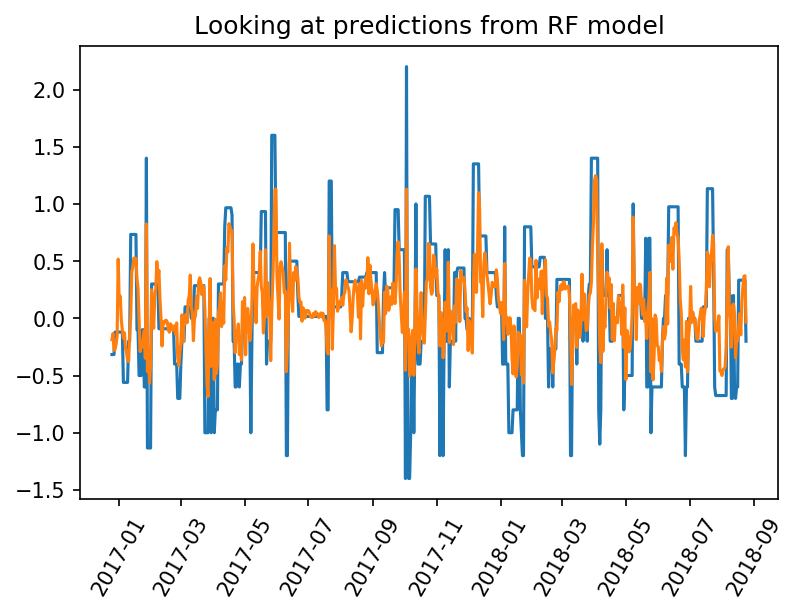

In [103]:
plt.figure(dpi=150)
plt.plot(X.index, y)
plt.plot(X.index, rf.predict(X))
plt.title("Looking at predictions from RF model")
plt.xticks(rotation=60);

In [113]:
rf_predictions = rf.predict(X)

print(rf_predictions)

[-1.86214159e-01 -1.33229287e-01 -2.79629602e-01 -2.71463564e-01
 -2.24712747e-01 -1.54838781e-01  5.17414582e-01  1.43882533e-01
  1.93400421e-01 -1.40113410e-02 -1.01150087e-01 -1.73593414e-01
 -1.26317148e-01 -2.62305599e-01 -2.93657936e-01 -3.68938336e-01
 -3.77115815e-01 -1.27093890e-01  1.16331963e-02  4.06512630e-01
  4.46342407e-01  5.26463587e-01  5.26517394e-01  5.23462419e-01
  3.47075687e-01  2.62357328e-01 -1.91656816e-02 -2.90675991e-01
 -2.23042114e-01 -2.52163935e-01 -1.75866273e-01 -1.07775906e-01
 -3.49073855e-01  8.24572140e-01 -4.66217455e-01 -2.61218818e-01
 -5.67761305e-01 -4.11059124e-01  2.50118587e-01  3.50109364e-02
 -8.67090814e-02  1.94702293e-01  2.53474910e-01  4.95701885e-01
  3.56280685e-01  4.18783626e-01  1.68618779e-01  2.64230080e-03
 -2.41929399e-01 -3.21943836e-02 -4.32397614e-02 -2.03718802e-02
 -1.65737669e-02 -3.12955020e-02 -1.00184072e-01 -1.21244995e-01
 -4.78392055e-02 -6.12775446e-02 -1.05069269e-01 -9.28857786e-02
 -6.46274715e-02 -1.40632

In [119]:
df.diff_weight_MA_7

Date
2016-12-16         NaN
2016-12-17         NaN
2016-12-18         NaN
2016-12-19         NaN
2016-12-20         NaN
2016-12-21         NaN
2016-12-22         NaN
2016-12-23   -0.316667
2016-12-24   -0.316667
2016-12-25   -0.316667
2016-12-26   -0.316667
2016-12-27   -0.316667
2016-12-28   -0.120000
2016-12-29   -0.120000
2016-12-30   -0.120000
2016-12-31   -0.120000
2017-01-01   -0.120000
2017-01-02   -0.120000
2017-01-03   -0.120000
2017-01-04   -0.120000
2017-01-05   -0.560000
2017-01-06   -0.560000
2017-01-07   -0.560000
2017-01-08   -0.560000
2017-01-09   -0.560000
2017-01-10   -0.200000
2017-01-11   -0.200000
2017-01-12    0.733333
2017-01-13    0.733333
2017-01-14    0.733333
                ...   
2018-07-29   -0.675000
2018-07-30   -0.675000
2018-07-31   -0.675000
2018-08-01   -0.675000
2018-08-02   -0.675000
2018-08-03   -0.675000
2018-08-04   -0.675000
2018-08-05   -0.675000
2018-08-06    0.600000
2018-08-07    0.600000
2018-08-08    0.200000
2018-08-09    0.200000
2018-0

In [142]:
rf_predictions[140:200]

array([ 0.34326127,  0.38968931,  0.58600907,  0.2771217 ,  0.22121862,
       -0.12806272,  0.01257985,  0.5986791 ,  0.01329623,  0.31323869,
        0.17949117,  0.06844377, -0.36939347,  0.05722561,  0.34359242,
        0.63046458,  1.12394496,  1.13020633,  0.36492786,  0.18766488,
       -0.00624911,  0.45610182,  0.49431525,  0.44179431,  0.40078438,
        0.22428156,  0.2372957 , -0.46667413, -0.24392596,  0.08076305,
        0.6566351 ,  0.29102862,  0.17798696,  0.06061947,  0.40038236,
        0.33153025,  0.45286611,  0.40921376,  0.3543788 ,  0.18450205,
        0.13928061,  0.14193476, -0.0253074 ,  0.09244893,  0.00292182,
        0.00236108,  0.06914321,  0.05595059,  0.0674163 ,  0.05305527,
        0.01528977,  0.00864908,  0.00751106,  0.0441364 ,  0.02277709,
        0.05904993,  0.03110566,  0.03948696,  0.0072532 ,  0.01997873])

In [128]:
len(predictions_rf[9:-3])

608

In [117]:
len(rf_predictions_diff_cumsum)

608

In [125]:
df.Weight.iloc[0]

nan

In [134]:
len(predictions_rf)

Date
2016-12-25    184.713786
2016-12-26    183.930557
2016-12-27    183.000927
2016-12-28    184.329463
2016-12-29    185.204751
2016-12-30    186.149912
2016-12-31    186.547326
2017-01-01    186.571209
2017-01-02    186.644609
2017-01-03    186.510598
2017-01-04    186.289448
2017-01-05    185.555855
2017-01-06    184.869537
2017-01-07    184.047232
2017-01-08    183.193574
2017-01-09    182.264636
2017-01-10    181.687520
2017-01-11    181.360426
2017-01-12    182.105392
2017-01-13    183.245238
2017-01-14    184.424914
2017-01-15    185.684711
2017-01-16    186.944562
2017-01-17    188.201357
2017-01-18    188.048433
2017-01-19    187.810790
2017-01-20    186.191625
2017-01-21    185.800949
2017-01-22    185.477907
2017-01-23    184.625743
                 ...    
2018-07-26    242.287513
2018-07-27    241.535714
2018-07-28    240.761597
2018-07-29    240.109170
2018-07-30    238.974762
2018-07-31    237.838026
2018-08-01    236.663493
2018-08-02    235.539994
2018-08-03    234.42

In [114]:
rf_predictions_diff_cumsum = rf_predictions.cumsum()
print(rf_predictions_diff_cumsum)

[-1.86214159e-01 -3.19443446e-01 -5.99073048e-01 -8.70536612e-01
 -1.09524936e+00 -1.25008814e+00 -7.32673559e-01 -5.88791025e-01
 -3.95390604e-01 -4.09401945e-01 -5.10552033e-01 -6.84145447e-01
 -8.10462595e-01 -1.07276819e+00 -1.36642613e+00 -1.73536447e+00
 -2.11248028e+00 -2.23957417e+00 -2.22794097e+00 -1.82142834e+00
 -1.37508594e+00 -8.48622350e-01 -3.22104956e-01  2.01357463e-01
  5.48433150e-01  8.10790477e-01  7.91624796e-01  5.00948805e-01
  2.77906691e-01  2.57427555e-02 -1.50123517e-01 -2.57899423e-01
 -6.06973278e-01  2.17598861e-01 -2.48618594e-01 -5.09837412e-01
 -1.07759872e+00 -1.48865784e+00 -1.23853925e+00 -1.20352832e+00
 -1.29023740e+00 -1.09553510e+00 -8.42060195e-01 -3.46358310e-01
  9.92237535e-03  4.28706001e-01  5.97324780e-01  5.99967081e-01
  3.58037682e-01  3.25843298e-01  2.82603537e-01  2.62231657e-01
  2.45657890e-01  2.14362388e-01  1.14178316e-01 -7.06667928e-03
 -5.49058848e-02 -1.16183429e-01 -2.21252698e-01 -3.14138477e-01
 -3.78765948e-01 -5.19398

In [172]:
X.columns

Index(['Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active', 'Calories',
       'Fat (g)', 'Saturated Fat', 'Polyunsaturated Fat',
       'Monounsaturated Fat', 'Trans Fat', 'Cholesterol',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Sodium (mg)',
       'Carbohydrates (g)', 'Sugar', 'Protein (g)', 'lag1', 'lag2', 'lag3',
       'lag4', 'lag5'],
      dtype='object')

In [178]:
predictions_rf = pd.Series(df.Weight[9] + rf_predictions_diff_cumsum, index=df.Weight.index[9:-3])
#predictions_rf = predictions_rf.add(rf_predictions,fill_value=0)
predictions_rf[140:200]

Date
2017-05-14    188.211496
2017-05-15    188.601185
2017-05-16    189.187194
2017-05-17    189.464316
2017-05-18    189.685535
2017-05-19    189.557472
2017-05-20    189.570052
2017-05-21    190.168731
2017-05-22    190.182027
2017-05-23    190.495266
2017-05-24    190.674757
2017-05-25    190.743201
2017-05-26    190.373807
2017-05-27    190.431033
2017-05-28    190.774625
2017-05-29    191.405090
2017-05-30    192.529035
2017-05-31    193.659241
2017-06-01    194.024169
2017-06-02    194.211834
2017-06-03    194.205585
2017-06-04    194.661687
2017-06-05    195.156002
2017-06-06    195.597796
2017-06-07    195.998581
2017-06-08    196.222862
2017-06-09    196.460158
2017-06-10    195.993484
2017-06-11    195.749558
2017-06-12    195.830321
2017-06-13    196.486956
2017-06-14    196.777985
2017-06-15    196.955972
2017-06-16    197.016591
2017-06-17    197.416973
2017-06-18    197.748504
2017-06-19    198.201370
2017-06-20    198.610584
2017-06-21    198.964962
2017-06-22    199.14

In [179]:
(rf_predictions.mean() )*608

59.06100417260997

In [180]:
df.Weight.shape

(620,)

In [181]:
df.Weight.head(25)

Date
2016-12-16           NaN
2016-12-17           NaN
2016-12-18           NaN
2016-12-19    186.800000
2016-12-20    186.483333
2016-12-21    186.166667
2016-12-22    185.850000
2016-12-23    185.533333
2016-12-24    185.216667
2016-12-25    184.900000
2016-12-26    184.250000
2016-12-27    183.600000
2016-12-28    185.200000
2016-12-29    186.300000
2016-12-30    187.400000
2016-12-31    187.280000
2017-01-01    187.160000
2017-01-02    187.040000
2017-01-03    186.920000
2017-01-04    186.800000
2017-01-05    186.240000
2017-01-06    185.680000
2017-01-07    185.120000
2017-01-08    184.560000
2017-01-09    184.000000
Name: Weight, dtype: float64

(175, 195)

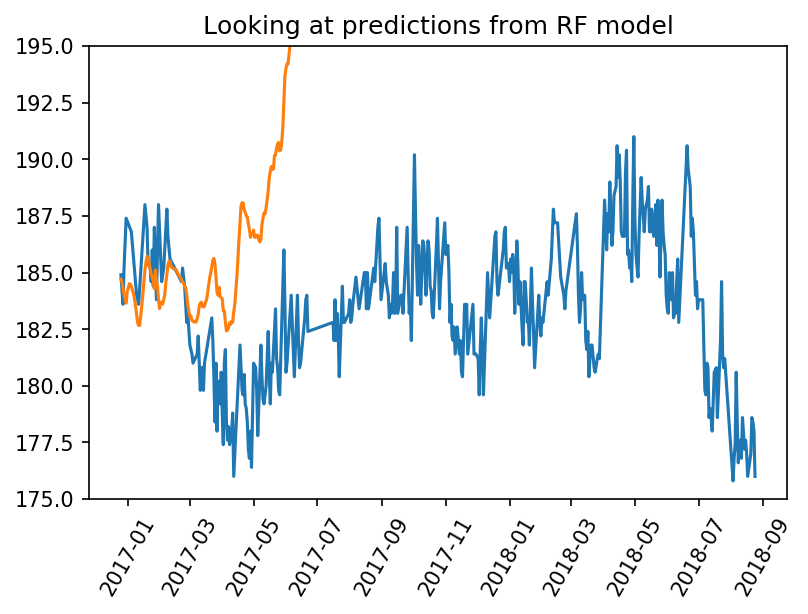

In [183]:
plt.figure(dpi=150)
plt.plot(X.index, df.Weight[9:-3])
plt.plot(X.index, predictions_rf)
plt.title("Looking at predictions from RF model")
plt.xticks(rotation=60);
plt.ylim(175, 195)

In [192]:
df['Predicted_weights'] = np.nan

In [193]:
df['Predicted_weights'][9:-3] = df.Weight[9:-3].values + rf_predictions

In [194]:
len(df.Weight[9:-3])

608

In [195]:
len(rf_predictions)

608

(175, 195)

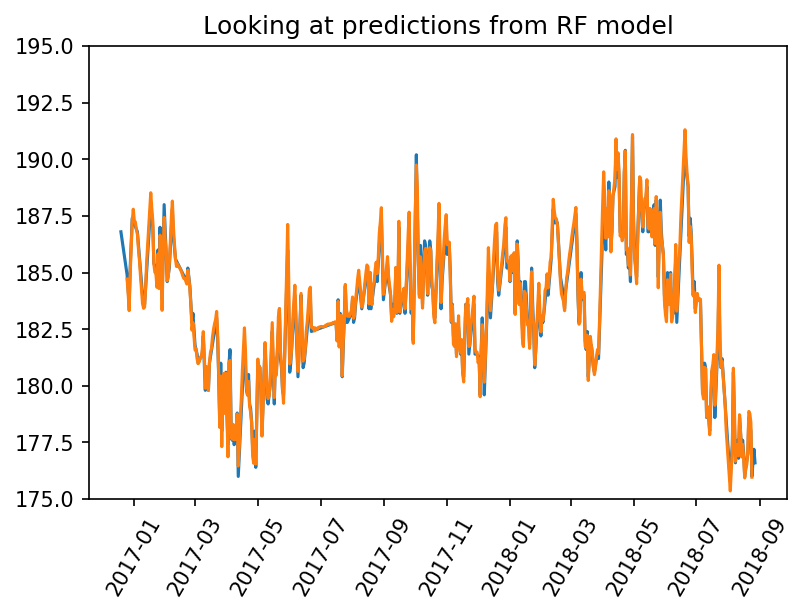

In [199]:
plt.figure(dpi=150)
plt.plot(df.index, df.Weight)
plt.plot(df.index, df.Predicted_weights)
plt.title("Looking at predictions from RF model")
plt.xticks(rotation=60);
plt.ylim(175, 195)

(175, 195)

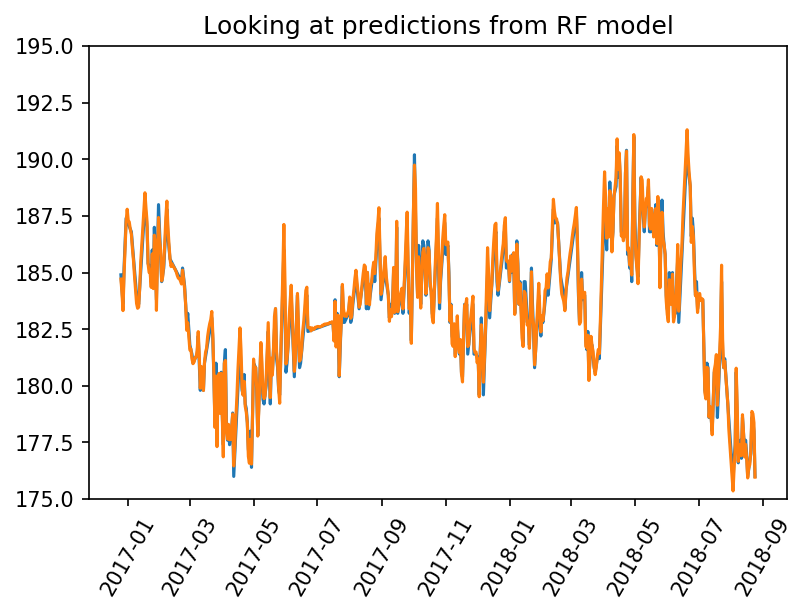

In [184]:
plt.figure(dpi=150)
plt.plot(X.index, df.Weight[9:-3])
plt.plot(X.index, df.Weight[9:-3].values + rf_predictions)
plt.title("Looking at predictions from RF model")
plt.xticks(rotation=60);
plt.ylim(175, 195)

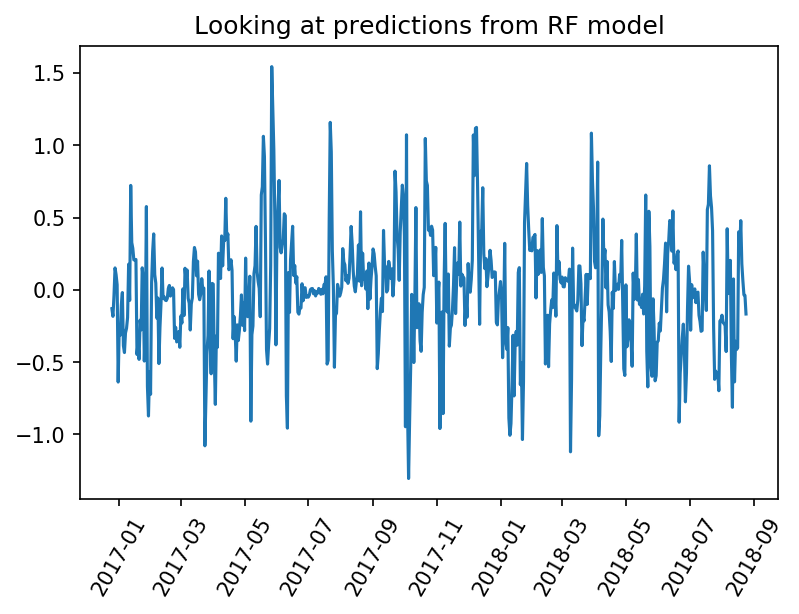

In [185]:
plt.figure(dpi=150)
plt.plot(X.index, y-rf_predictions)
plt.title("Looking at predictions from RF model")
plt.xticks(rotation=60);

In [204]:
df.head(20)

Date        Steps  Distance  Calories_Burned    Floors  Elevation  \
0  2016-12-16  7949.359551  6.100120           1856.0  6.528090  19.629213   
1  2016-12-17  5514.820225  4.235007           1855.0  7.089888  21.438202   
2  2016-12-18  4782.921348  3.679812           1855.0  5.146067  15.494382   
3  2016-12-19  6743.966292  5.175902           1855.0  4.640449  13.977528   
4  2016-12-20  7318.181818  5.671428           1854.0  5.215909  15.704545   
5  2016-12-21  7112.386364  5.472372           1854.0  3.909091  11.761364   
6  2016-12-22  7365.511364  5.715491           1854.0  4.420455  13.284091   
7  2016-12-23  7949.359551  6.100120           1853.0  6.528090  19.629213   
8  2016-12-24  5514.820225  4.235007           1853.0  7.089888  21.438202   
9  2016-12-25  1178.000000  0.882320           2074.0  3.000000   9.000000   
10 2016-12-26  4058.000000  3.039440           2629.0  3.000000   9.000000   
11 2016-12-27  6378.000000  4.777120           2633.0  3.000000   9.000000   
12 2016-12-28  9507.000000  7.581090           3267.0  9.000000  27.000000   
13 2016-12-29  6472.000000  4.847520           2775.0  6.000000  18.000000   
14 2016-12-30  2989.000000  2.238760           2384.0  6.528090  19.629213   
15 2016-12-31   784.000000  0.587210           2155.0  1.000000   3.000000   
16 2017-01-01   137.000000  0.102610           1887.0  5.146067  15.494382   
17 2017-01-02  4791.000000  4.045170           2617.0  1.000000   3.000000   
18 2017-01-03  5224.000000  3.912770           2497.0  4.000000  12.000000   
19 2017-01-04  7864.000000  6.401960           2972.0  1.000000   3.000000   

    Activity_Calories  Minutes_Sedentary  Minutes_Lightly_Active  \
0         1059.067416             1440.0              180.853933   
1          781.202247             1440.0              102.426966   
2          702.179775             1440.0               85.123596   
3          869.786517             1440.0              127.393258   
4          911.261364             1440.0              148.397727   
5          899.102273             1440.0              155.465909   
6          857.477273             1440.0              145.545455   
7         1059.067416             1440.0              180.853933   
8          781.202247             1440.0              102.426966   
9          268.000000             1368.0               72.000000   
10         973.000000              750.0              210.000000   
11         923.000000              848.0              168.000000   
12        1464.000000              699.0              262.000000   
13        1054.000000              793.0              141.000000   
14         495.000000              781.0              120.000000   
15         172.000000              987.0               45.000000   
16          33.000000             1431.0                9.000000   
17         840.000000              829.0              131.000000   
18         776.000000              840.0              174.000000   
19        1319.000000              710.0              205.000000   

    Minutes_Fairly_Active        ...                 z  diff_weight  \
0                8.977528        ...               NaN          NaN   
1               13.404494        ...               NaN          NaN   
2               12.157303        ...               NaN          NaN   
3                9.348315        ...               NaN          NaN   
4                8.636364        ...               NaN    -0.316667   
5                7.477273        ...               NaN    -0.316667   
6                6.340909        ...               NaN    -0.316667   
7                8.977528        ...               NaN    -0.316667   
8               13.404494        ...               NaN    -0.316667   
9               12.157303        ...               NaN    -0.316667   
10               8.000000        ...               NaN    -0.650000   
11               1.000000        ...               NaN    -0.650000   
12               5

In [202]:
df.reset_index(inplace=True)

df.to_csv('Data/Kojak_weights.csv')

In [203]:
df.head()

Date        Steps  Distance  Calories_Burned    Floors  Elevation  \
0 2016-12-16  7949.359551  6.100120           1856.0  6.528090  19.629213   
1 2016-12-17  5514.820225  4.235007           1855.0  7.089888  21.438202   
2 2016-12-18  4782.921348  3.679812           1855.0  5.146067  15.494382   
3 2016-12-19  6743.966292  5.175902           1855.0  4.640449  13.977528   
4 2016-12-20  7318.181818  5.671428           1854.0  5.215909  15.704545   

   Activity_Calories  Minutes_Sedentary  Minutes_Lightly_Active  \
0        1059.067416             1440.0              180.853933   
1         781.202247             1440.0              102.426966   
2         702.179775             1440.0               85.123596   
3         869.786517             1440.0              127.393258   
4         911.261364             1440.0              148.397727   

   Minutes_Fairly_Active        ...           z  diff_weight  \
0               8.977528        ...         NaN          NaN   
1              13.404494        ...         NaN          NaN   
2              12.157303        ...         NaN          NaN   
3               9.348315        ...         NaN          NaN   
4               8.636364        ...         NaN    -0.316667   

   diff_weight_MA_30  diff_weight_MA_7  lag1  lag2  lag3  lag4  lag5  \
0                NaN               NaN   NaN   NaN   NaN   NaN   NaN   
1                NaN               NaN   NaN   NaN   NaN   NaN   NaN   
2                NaN               NaN   NaN   NaN   NaN   NaN   NaN   
3                NaN               NaN   NaN   NaN   NaN   NaN   NaN   
4                NaN               NaN   NaN   NaN   NaN   NaN   NaN   

   Predicted_weights  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 61 columns]

# New heading

# Now to use ARIMA and SARIMA

In [78]:
df[['Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
               'Calories', 'Fat (g)','Saturated Fat', 'Polyunsaturated Fat',
               'Monounsaturated Fat','Trans Fat', 'Cholesterol',
               'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Sodium (mg)',
               'Carbohydrates (g)', 'Sugar', 'Protein (g)']][3:]

Steps  Minutes_Sedentary  Minutes_Lightly_Active  \
Date                                                                  
2016-12-19   6743.966292             1440.0              127.393258   
2016-12-20   7318.181818             1440.0              148.397727   
2016-12-21   7112.386364             1440.0              155.465909   
2016-12-22   7365.511364             1440.0              145.545455   
2016-12-23   7949.359551             1440.0              180.853933   
2016-12-24   5514.820225             1440.0              102.426966   
2016-12-25   1178.000000             1368.0               72.000000   
2016-12-26   4058.000000              750.0              210.000000   
2016-12-27   6378.000000              848.0              168.000000   
2016-12-28   9507.000000              699.0              262.000000   
2016-12-29   6472.000000              793.0              141.000000   
2016-12-30   2989.000000              781.0              120.000000   
2016-12-31    784.000000              987.0               45.000000   
2017-01-01    137.000000             1431.0                9.000000   
2017-01-02   4791.000000              829.0              131.000000   
2017-01-03   5224.000000              840.0              174.000000   
2017-01-04   7864.000000              710.0              205.000000   
2017-01-05   4709.000000              845.0              141.000000   
2017-01-06  13146.000000              651.0              323.000000   
2017-01-07   3002.000000              818.0              126.000000   
2017-01-08   4392.000000              773.0              127.000000   
2017-01-09   5423.000000              765.0              203.000000   
2017-01-10  10152.000000              702.0              223.000000   
2017-01-11   9289.000000              649.0              310.000000   
2017-01-12   6284.000000              799.0              141.000000   
2017-01-13  13866.000000              587.0              266.000000   
2017-01-14   5606.000000              782.0              193.000000   
2017-01-15   4252.000000              841.0              144.000000   
2017-01-16   4370.000000             1321.0              110.000000   
2017-01-17   4236.000000             1282.0              120.000000   
...                  ...                ...                     ...   
2018-07-29   4782.921348             1440.0               85.123596   
2018-07-30   6743.966292             1440.0              127.393258   
2018-07-31   3985.000000             1440.0              148.397727   
2018-08-01   4173.000000             1440.0              155.465909   
2018-08-02   7469.000000             1440.0              145.545455   
2018-08-03  10066.000000             1440.0              180.853933   
2018-08-04   8927.000000             1440.0              102.426966   
2018-08-05   2260.000000             1440.0               85.123596   
2018-08-06   7036.000000             1251.0              150.000000   
2018-08-07  10049.000000              716.0              195.000000   
2018-08-08   9404.000000              707.0              196.000000   
2018-08-09   3897.000000             1309.0              116.000000   
2018-08-10   7947.000000             1208.0              196.000000   
2018-08-11   3713.000000              806.0               12.000000   
2018-08-12   9530.000000             1383.0               21.000000   
2018-08-13   9455.000000             1440.0              127.393258   
2018-08-14   5213.000000             1433.0                7.000000   
2018-08-15    284.000000             1035.0               15.000000   
2018-08-16   7299.000000             1226.0              169.000000   
2018-08-17   7047.000000              761.0              176.000000   
2018-08-18   5514.820225             1440.0              102.426966   
2018-08-19   5901.000000             1380.0               17.000000   
2018-08-20  11104.000000             1143.0              174.000000   
2018-08-21  10111.000000             1222.0

In [79]:
dfWeight

Date
2016-12-16           NaN
2016-12-17           NaN
2016-12-18           NaN
2016-12-19    186.800000
2016-12-20    186.483333
2016-12-21    186.166667
2016-12-22    185.850000
2016-12-23    185.533333
2016-12-24    185.216667
2016-12-25    184.900000
2016-12-26    184.250000
2016-12-27    183.600000
2016-12-28    185.200000
2016-12-29    186.300000
2016-12-30    187.400000
2016-12-31    187.280000
2017-01-01    187.160000
2017-01-02    187.040000
2017-01-03    186.920000
2017-01-04    186.800000
2017-01-05    186.240000
2017-01-06    185.680000
2017-01-07    185.120000
2017-01-08    184.560000
2017-01-09    184.000000
2017-01-10    183.800000
2017-01-11    183.600000
2017-01-12    184.333333
2017-01-13    185.066667
2017-01-14    185.800000
                 ...    
2018-07-29    179.175000
2018-07-30    178.500000
2018-07-31    177.825000
2018-08-01    177.150000
2018-08-02    176.475000
2018-08-03    175.800000
2018-08-04    176.800000
2018-08-05    177.400000
2018-08-06    180.60

In [80]:
from statsmodels.tsa.arima_model import ARMA, ARIMA

dfWeight = df.Weight.astype(float)

exog_vars = df[['Steps', 'Minutes_Sedentary',
               'Saturated Fat', 'Polyunsaturated Fat',
               'Monounsaturated Fat','Trans Fat', 'Cholesterol',
               'Minutes_Very_Active', 'Sodium (mg)',
               'Carbohydrates (g)', 'Sugar', 'Protein (g)']][3:]

# create ARIMA210 model
arima510 = ARIMA(dfWeight, (5, 1, 0), exog=exog_vars).fit() # remember, we should L1 difference
arima510.summary()

ValueError: The indices for endog and exog are not aligned

In [ ]:
# calculate autocorr of differenced sales data
dfWeight.diff(1).autocorr(5)
# notice it matches the L1 coef; L2's p-value renders it useless

In [ ]:
# plot differenced sales data
dfWeight.diff(1).plot();
# it's detrended, but  variance is not constant. Why not? Mostly good except holidays; only seasonal ARIMA can help

In [ ]:
# plot_predict
print(len(dfWeight))
fig, ax = plt.subplots()
ax = dfw[:120].plot(ax=ax)
plt.plot(dfWeight.index[120:200], dfWeight[120:200], 'c', lw=1, alpha=0.8, zorder=-1, label="Actual")
fig = arima510.plot_predict(120, 200,ax=ax, plot_insample=False)

In [ ]:
plt.plot(dfWeight.index[120:200], dfWeight[120:200], 'c', lw=1, alpha=0.8, zorder=-1, label="Actual")

In [ ]:
# plot residuals
arima510.resid.plot();

In [ ]:
# plot acf and pacf
print(plot_acf(arima510.resid, lags=50))
print(plot_pacf(arima510.resid, lags=50))

In [ ]:
# fit better sarima
sarima2 = sm.tsa.statespace.SARIMAX(dfWeight, order=(0,0,0), seasonal_order=(0,1,1,2), exog=exog_vars, trend='c').fit()
sarima2.summary()

In [ ]:
df[['Steps', 'Minutes_Sedentary', 'Minutes_Lightly_Active',
               'Calories','Saturated Fat', 'Polyunsaturated Fat',
               'Monounsaturated Fat','Trans Fat', 'Cholesterol',
               'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Sodium (mg)',
               'Carbohydrates (g)', 'Sugar', 'Protein (g)']].corr()

In [ ]:
df

## LOOK AT TWO REAL LECTURES FOR AUTOCORRELATION/PARTIAL AUTOCORRELATION TIPS